In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cyber = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')
df_cyber.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [3]:
df_cyber.sample(10)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
1622,UK,2015,Phishing,Telecommunications,21.80,312051,Nation-state,Unpatched Software,VPN,41
1480,Russia,2016,Phishing,Retail,70.40,480522,Unknown,Zero-day,Antivirus,72
546,Russia,2019,Ransomware,Healthcare,21.95,217438,Hacker Group,Social Engineering,Firewall,14
2380,China,2017,Man-in-the-Middle,Banking,62.39,855974,Unknown,Social Engineering,VPN,44
413,Brazil,2024,SQL Injection,Banking,33.06,644841,Insider,Weak Passwords,Antivirus,64
487,Japan,2024,Malware,Retail,56.90,353887,Unknown,Weak Passwords,Antivirus,59
1263,UK,2023,DDoS,IT,52.75,638329,Hacker Group,Social Engineering,Firewall,11
174,India,2022,Malware,Government,84.15,849745,Hacker Group,Social Engineering,Antivirus,51
1383,Australia,2020,Ransomware,Banking,97.48,647303,Insider,Zero-day,Antivirus,37
665,UK,2023,Malware,Banking,16.02,452477,Hacker Group,Zero-day,Encryption,23


1. Most common vulnerability types (Security Vulnerability Type): There seems to be only 4 main ways of Security Vulnerability which are Zero-Day, Social Engineering, Unpatched Software, Weak Passwords.

In [4]:
df_cyber_SVT = df_cyber['Security Vulnerability Type']

In [5]:
cyber_value_counts = df_cyber['Security Vulnerability Type'].value_counts()
cyber_value_counts

Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64

[Text(0, 0, '785'), Text(0, 0, '747'), Text(0, 0, '738'), Text(0, 0, '730')]

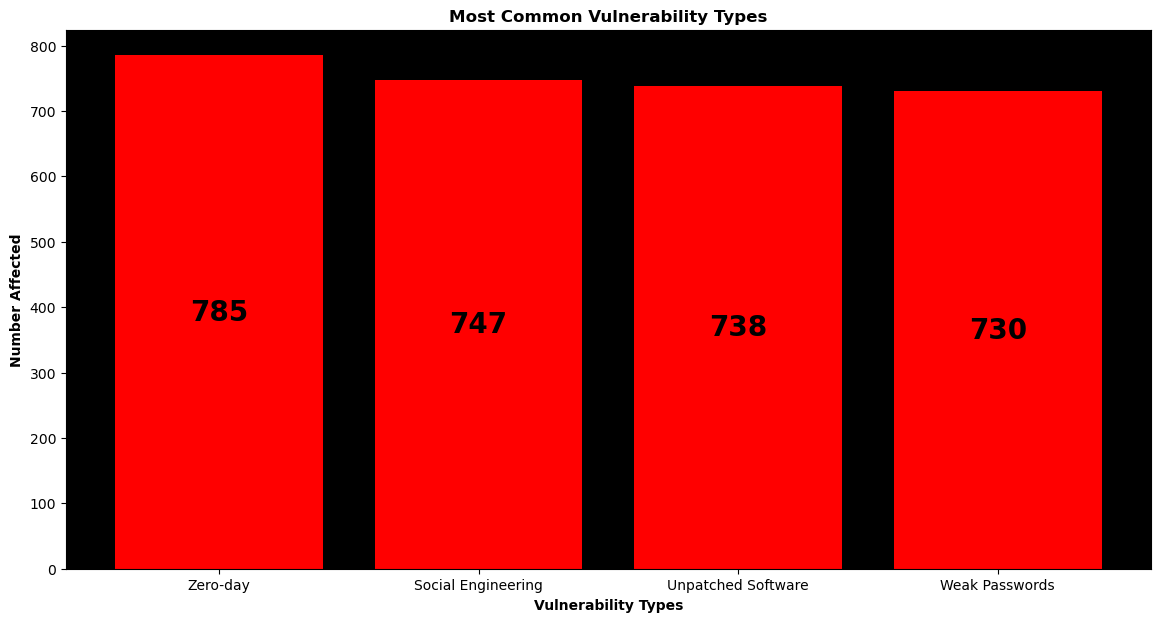

In [6]:
fig,ax = plt.subplots(figsize = (14, 7))
bars= ax.bar(cyber_value_counts.index, cyber_value_counts, color= 'red')
(
ax.set_title('Most Common Vulnerability Types', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Vulnerability Types', weight = 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
) 
plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

In [7]:
df_cyber.groupby('Year').mean(numeric_only=True)

,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
Year,,,
2015,52.383430,510083.646209,38.429603
2016,48.937754,505384.505263,35.922807
2017,50.977053,507234.733542,35.388715
2018,47.485419,489596.625806,36.980645
2019,49.941787,495106.190114,35.247148
2020,50.056984,504878.606349,36.444444
2021,53.088328,519204.010033,36.167224
2022,49.908365,513406.163522,37.204403
2023,50.660571,489859.225397,36.946032


In [8]:
df_counts = (
    df_cyber[['Attack Type', 'Attack Source', 'Country', 'Year']]
    .value_counts()
    .reset_index(name='count')
)

In [9]:
df_counts_sorted = df_counts.sort_values('count', ascending=False)

In [10]:
popular_attack_types = df_cyber['Attack Type'].value_counts()
popular_attack_sources = df_cyber['Attack Source'].value_counts()

In [11]:
summary = (
    df_cyber.groupby(['Year', 'Attack Type', 'Attack Source', 'Country'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

Most common attacks used against that vulnerability

Most common vulnerability types (Security Vulnerability Type).
    a. Most common attacks used against that vulnerability
        - Separate each vulnerability into a dataframe (Only 4 Vulnerablitlites, You can create a bar chart in the same way)

Types of attacks used with Unpatched Software.

In [12]:
df_Unpatched_software = df_cyber[df_cyber['Security Vulnerability Type'] == 'Unpatched Software']
df_Unpatched_software

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
6,Germany,2016,DDoS,Telecommunications,33.26,431262,Insider,Unpatched Software,VPN,34
9,UK,2023,DDoS,Healthcare,69.14,685927,Hacker Group,Unpatched Software,Firewall,58
11,China,2016,SQL Injection,Healthcare,38.81,920768,Hacker Group,Unpatched Software,AI-based Detection,27
...,...,...,...,...,...,...,...,...,...,...
2987,Australia,2021,Ransomware,Healthcare,37.89,843256,Nation-state,Unpatched Software,Antivirus,43
2989,Brazil,2021,Ransomware,Education,18.11,849791,Nation-state,Unpatched Software,VPN,53
2993,Germany,2017,SQL Injection,Education,54.98,786577,Insider,Unpatched Software,Firewall,70
2994,Germany,2019,Ransomware,Government,58.60,76066,Insider,Unpatched Software,AI-based Detection,8


In [13]:
df_cyber_unpatched_software = df_Unpatched_software['Attack Type'].value_counts()

[Text(0, 0, '135'),
 Text(0, 0, '127'),
 Text(0, 0, '124'),
 Text(0, 0, '124'),
 Text(0, 0, '121'),
 Text(0, 0, '107')]

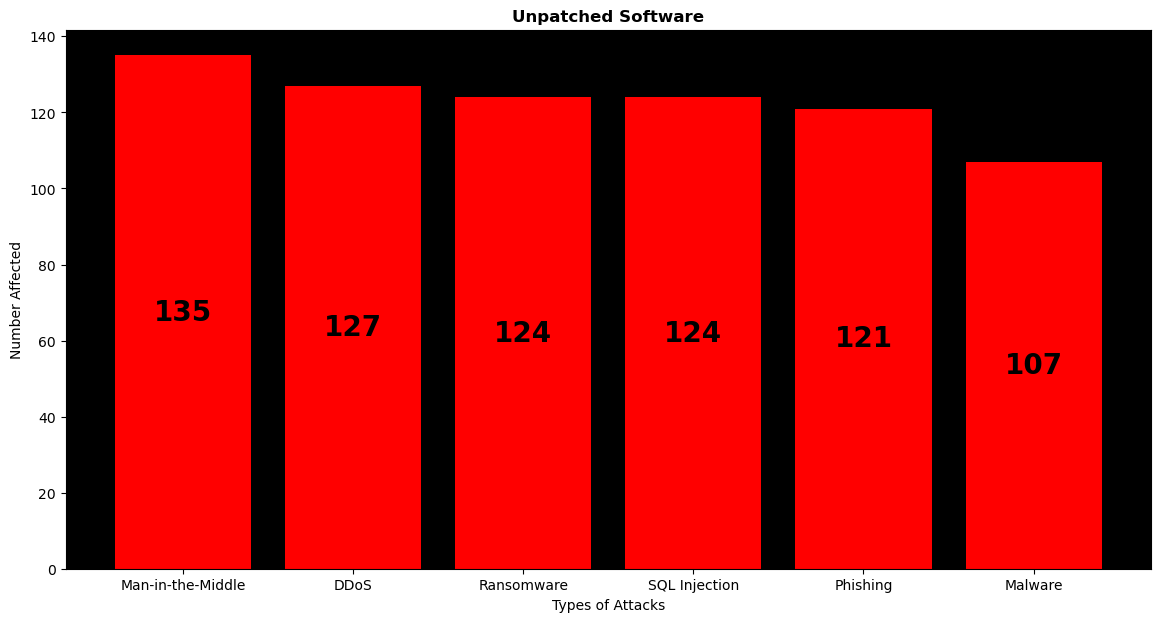

In [14]:
fig, ax = plt.subplots(figsize = (14, 7))
bars= ax.bar(df_cyber_unpatched_software.index, df_cyber_unpatched_software, color='red')
(
ax.set_title('Unpatched Software', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attacks'),
ax.set_ylabel('Number Affected')
)
plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

Types of attacks used with Social Engineering

In [15]:
df_SocialEngineering = df_cyber[df_cyber['Security Vulnerability Type'] == 'Social Engineering']
df_SocialEngineering

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
5,Germany,2017,Man-in-the-Middle,Retail,98.24,285201,Unknown,Social Engineering,Antivirus,25
7,France,2018,SQL Injection,Government,59.23,909991,Unknown,Social Engineering,Antivirus,66
8,India,2016,Man-in-the-Middle,Banking,16.88,698249,Unknown,Social Engineering,VPN,47
...,...,...,...,...,...,...,...,...,...,...
2981,China,2015,SQL Injection,Healthcare,24.07,950991,Nation-state,Social Engineering,Encryption,49
2983,Australia,2024,DDoS,Telecommunications,36.49,35041,Hacker Group,Social Engineering,Antivirus,14
2988,USA,2022,SQL Injection,IT,37.94,691377,Hacker Group,Social Engineering,Antivirus,44
2991,Russia,2019,Ransomware,Banking,28.14,594170,Nation-state,Social Engineering,AI-based Detection,53


In [16]:
df_SocialEngineering_valuecounts = df_SocialEngineering['Attack Type'].value_counts()
df_SocialEngineering_valuecounts

Attack Type
Ransomware           141
DDoS                 132
Malware              130
Phishing             124
SQL Injection        116
Man-in-the-Middle    104
Name: count, dtype: int64

[Text(0, 0, '141'),
 Text(0, 0, '132'),
 Text(0, 0, '130'),
 Text(0, 0, '124'),
 Text(0, 0, '116'),
 Text(0, 0, '104')]

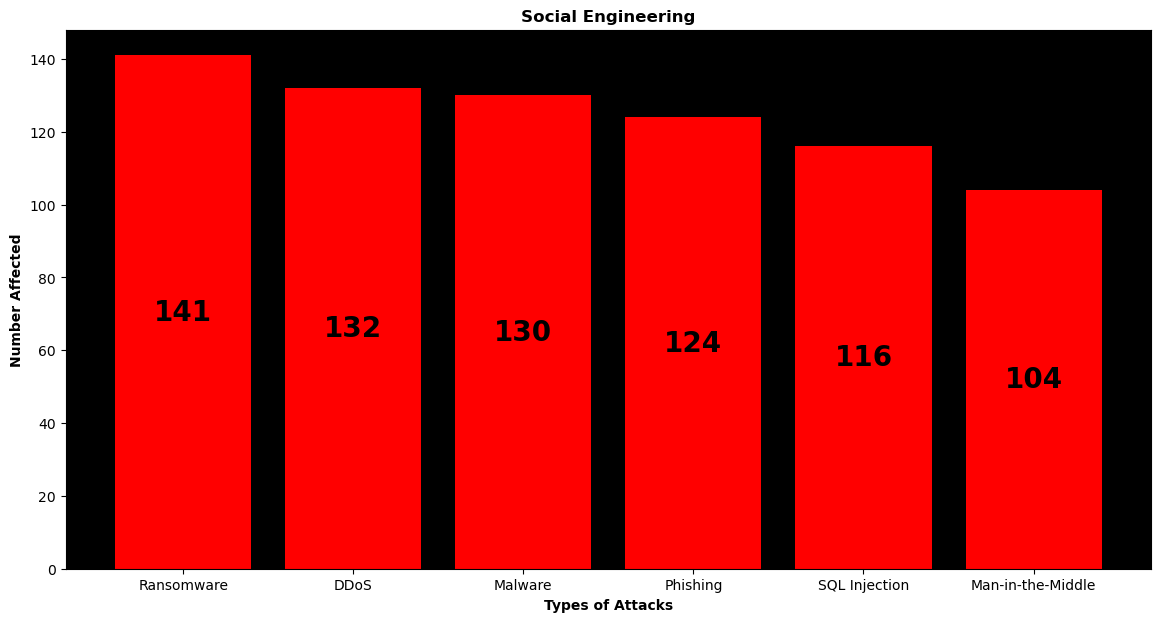

In [17]:
fig, ax = plt.subplots(figsize = (14, 7))

bars = ax.bar(df_SocialEngineering_valuecounts.index, df_SocialEngineering_valuecounts, color= 'red')
(
ax.set_title('Social Engineering', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attacks', weight = 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
)
plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

Types of attacks used with Zero-day

In [18]:
df_Zeroday = df_cyber[df_cyber['Security Vulnerability Type'] == 'Zero-day']
df_Zeroday

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
10,China,2019,Phishing,Telecommunications,88.67,493675,Unknown,Zero-day,VPN,29
12,India,2019,Ransomware,Education,30.56,583204,Insider,Zero-day,Firewall,37
15,Australia,2022,Phishing,Banking,64.31,120789,Nation-state,Zero-day,Encryption,36
25,China,2021,Phishing,Retail,51.06,628562,Insider,Zero-day,AI-based Detection,52
29,Australia,2015,DDoS,Government,82.70,904805,Hacker Group,Zero-day,Encryption,61
...,...,...,...,...,...,...,...,...,...,...
2986,Brazil,2015,Malware,Healthcare,88.08,905770,Nation-state,Zero-day,VPN,9
2990,France,2015,Phishing,Telecommunications,65.16,998011,Unknown,Zero-day,Encryption,14
2992,UK,2021,Malware,Banking,60.14,191427,Nation-state,Zero-day,Encryption,56
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26


In [19]:
df_Zeroday_valuecounts = df_Zeroday['Attack Type'].value_counts()
df_Zeroday_valuecounts

Attack Type
Phishing             160
Malware              135
SQL Injection        134
DDoS                 126
Man-in-the-Middle    118
Ransomware           112
Name: count, dtype: int64

[Text(0, 0, '160'),
 Text(0, 0, '135'),
 Text(0, 0, '134'),
 Text(0, 0, '126'),
 Text(0, 0, '118'),
 Text(0, 0, '112')]

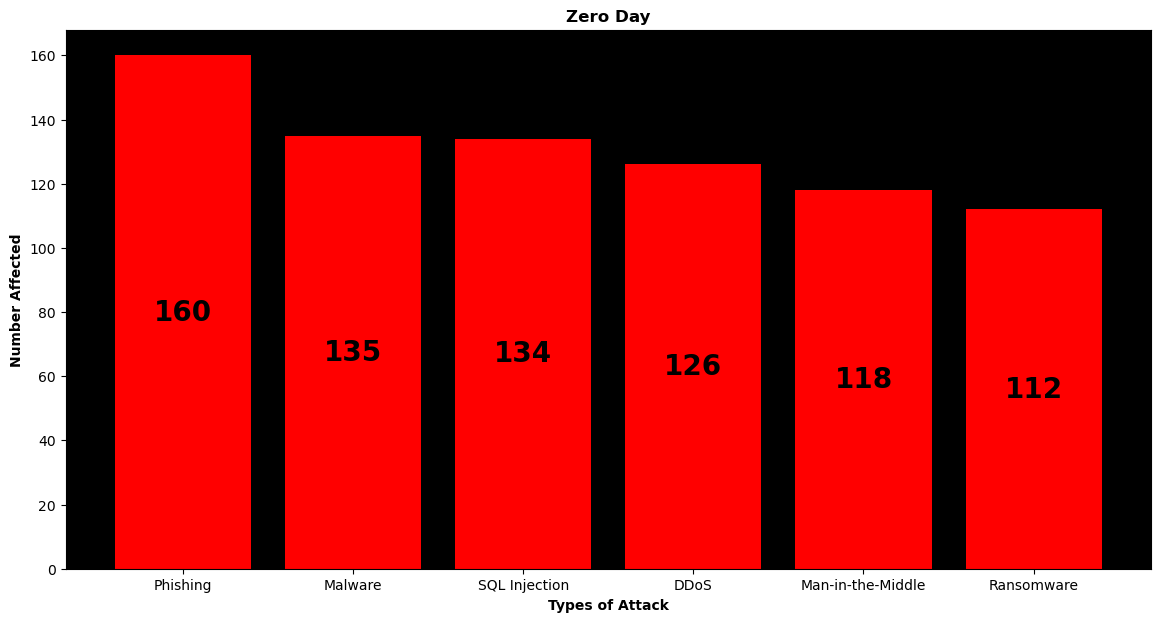

In [20]:
fig, ax = plt.subplots(figsize = (14, 7))
bars = ax.bar(df_Zeroday_valuecounts.index, df_Zeroday_valuecounts, color= 'red')
(
ax.set_title('Zero Day', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attack', weight = 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

(-1.0999969980119912,
 1.0999998570481901,
 -1.0999985056096746,
 1.0999967724133621)

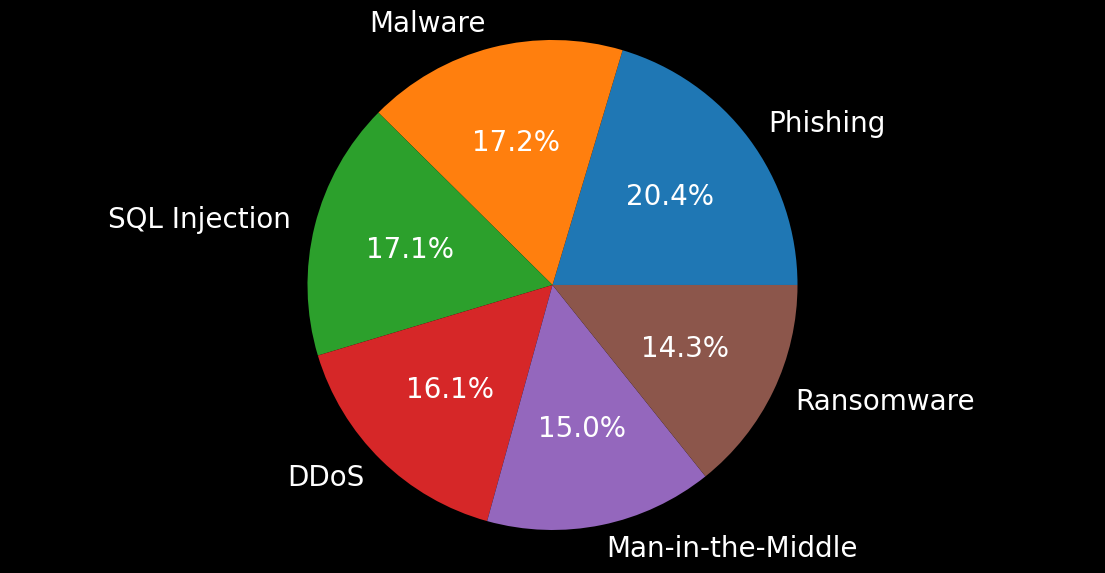

In [21]:
fig, ax = plt.subplots(figsize = (14, 7))
fig.patch.set_facecolor('black')
wedges, texts, autotexts = ax.pie(
    df_Zeroday_valuecounts,
    labels = df_Zeroday_valuecounts.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 20, 'color': 'white'}
    )
#ax.set_title('Zero Day', weight='bold', color = 'white', fontsize = 25)
ax.set_facecolor('black')
ax.axis('equal')

Types of attacks used with Weak Passwords

In [22]:
df_weakpasswords = df_cyber[df_cyber['Security Vulnerability Type'] == 'Weak Passwords']
df_weakpasswords

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
20,Brazil,2015,Ransomware,Retail,49.55,920172,Hacker Group,Weak Passwords,Antivirus,43
23,Japan,2022,Phishing,Telecommunications,20.42,186148,Nation-state,Weak Passwords,Antivirus,32
34,Brazil,2023,Phishing,Healthcare,14.51,113777,Nation-state,Weak Passwords,VPN,27
38,USA,2022,DDoS,Retail,32.53,235314,Insider,Weak Passwords,AI-based Detection,62
...,...,...,...,...,...,...,...,...,...,...
2957,Russia,2022,DDoS,Banking,84.09,153829,Hacker Group,Weak Passwords,VPN,6
2969,Russia,2022,SQL Injection,IT,2.10,354694,Insider,Weak Passwords,Encryption,18
2971,France,2024,SQL Injection,Government,9.91,248359,Nation-state,Weak Passwords,Firewall,58
2973,Brazil,2016,Man-in-the-Middle,Education,19.59,647998,Insider,Weak Passwords,AI-based Detection,38


In [23]:
df_weakpasswords_valuecounts = df_weakpasswords['Attack Type'].value_counts()
df_weakpasswords_valuecounts

Attack Type
DDoS                 146
SQL Injection        129
Phishing             124
Ransomware           116
Malware              113
Man-in-the-Middle    102
Name: count, dtype: int64

[Text(0, 0, '146'),
 Text(0, 0, '129'),
 Text(0, 0, '124'),
 Text(0, 0, '116'),
 Text(0, 0, '113'),
 Text(0, 0, '102')]

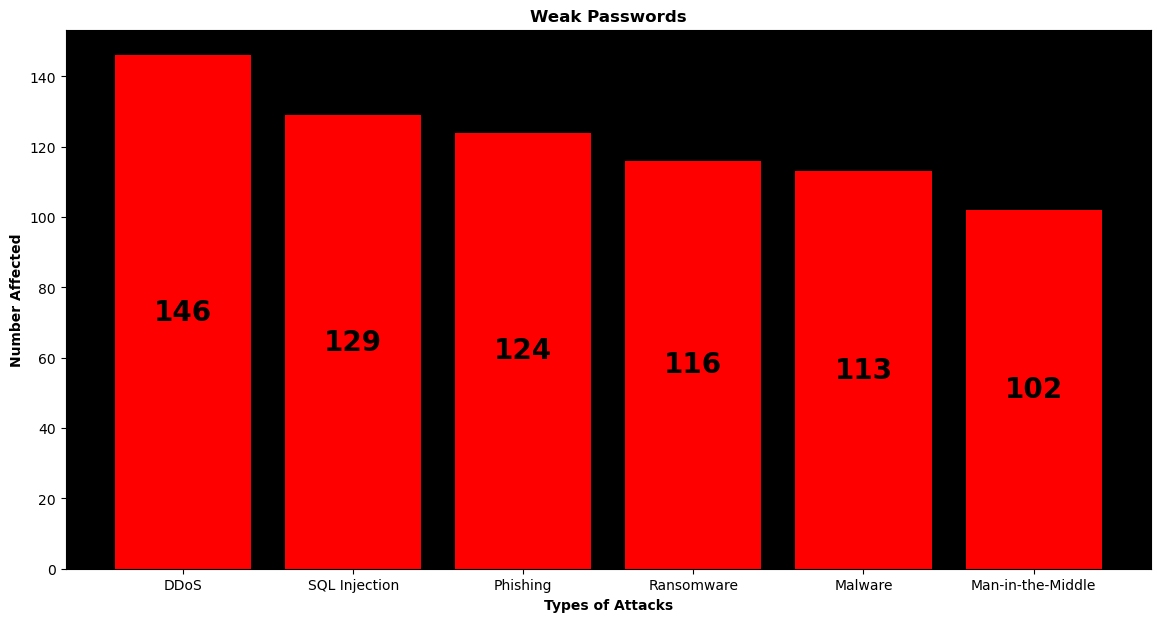

In [24]:
fig, ax = plt.subplots(figsize = (14, 7))
bars = ax.bar(df_weakpasswords_valuecounts.index, df_weakpasswords_valuecounts, color='red')
(
ax.set_title('Weak Passwords', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attacks', weight = 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
)
plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

2. Most popular types of attacks (Attack Type and Attack Source)

In [25]:
attacktypes_counts = df_cyber['Attack Type'].value_counts()
print(attacktypes_counts)

Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64


Attack Types Bar Graph

[Text(0, 0, '531'),
 Text(0, 0, '529'),
 Text(0, 0, '503'),
 Text(0, 0, '493'),
 Text(0, 0, '485'),
 Text(0, 0, '459')]

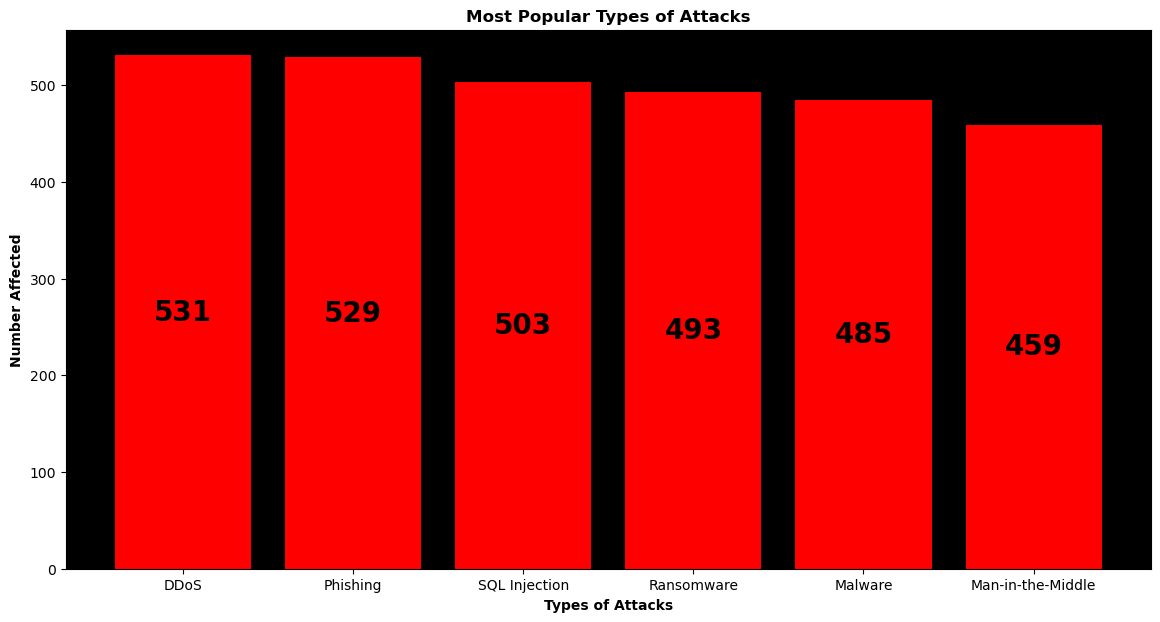

In [26]:
fig,ax = plt.subplots(figsize = (14, 7))
bars = ax.bar(attacktypes_counts.index, attacktypes_counts, color='red')

(
ax.set_title('Most Popular Types of Attacks', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attacks', weight = 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
)
plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

Attack Source Bar Graph

In [27]:
df_attacksource_counts = df_cyber['Attack Source'].value_counts()
df_attacksource_counts

Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64

[Text(0, 0, '794'), Text(0, 0, '768'), Text(0, 0, '752'), Text(0, 0, '686')]

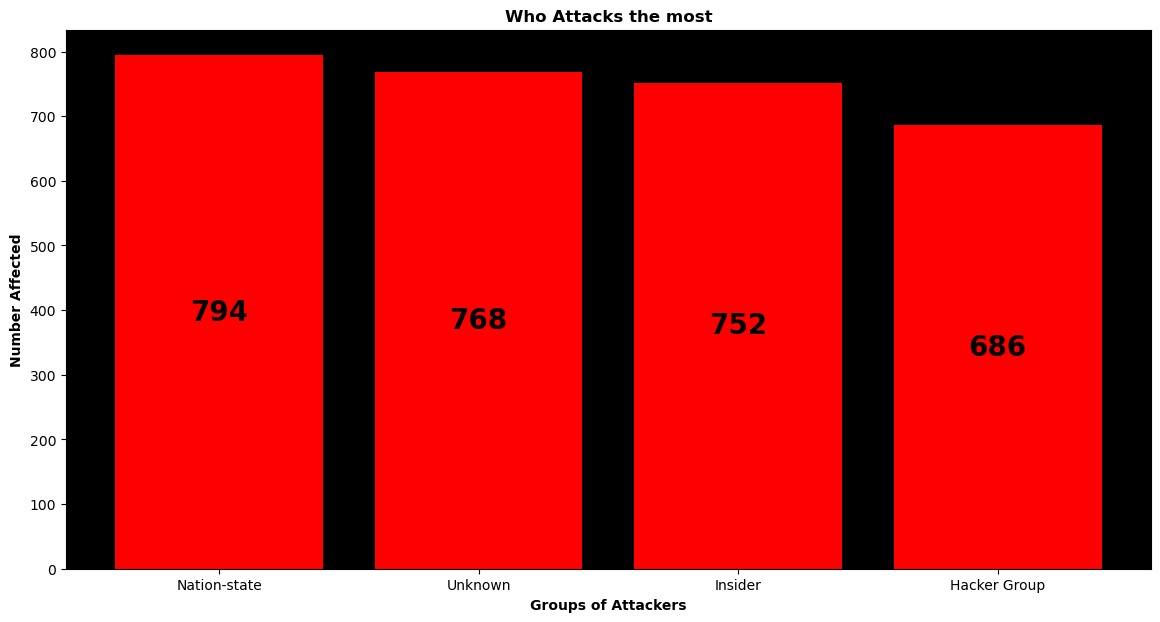

In [28]:
fig,ax = plt.subplots(figsize = (14, 7))
bars = ax.bar(df_attacksource_counts.index, df_attacksource_counts, color='red')
(
ax.set_title('Who Attacks the most', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Groups of Attackers', weight = 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

(-1.0999996361174003, 1.099999982672257, -1.0999996422496259, 1.09999976551608)

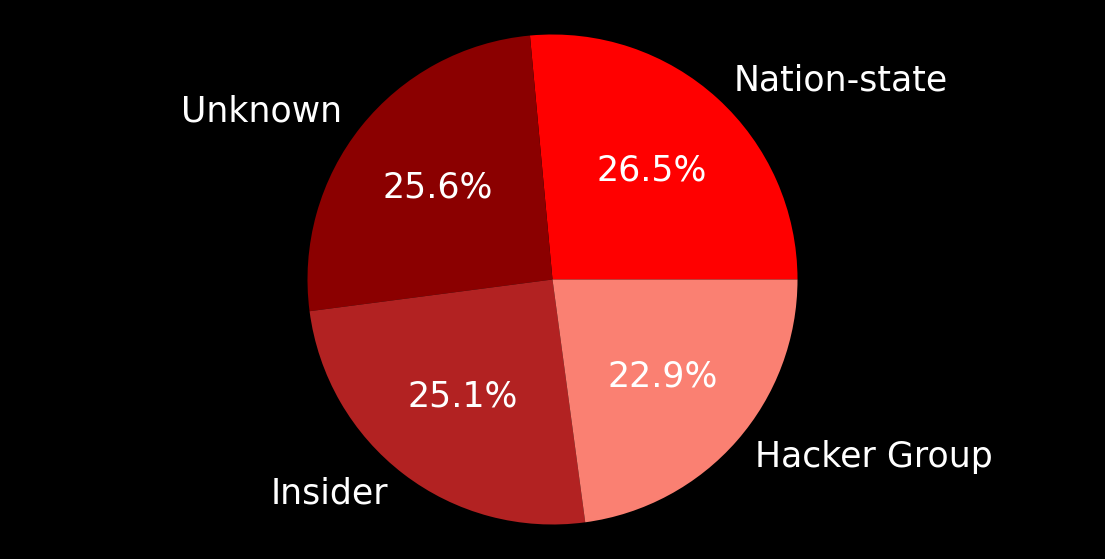

In [29]:
fig, ax = plt.subplots(figsize = (14, 7))
fig.patch.set_facecolor('black')
wedges, texts, autotexts = ax.pie(
    df_attacksource_counts,
    labels = df_attacksource_counts.index,
    autopct='%1.1f%%',
    textprops = {'fontsize': 25, 'color': 'white'},
    colors = ['red', 'darkred', 'firebrick', 'salmon'] 
    )
# ax.set_title('Who attacks the most', weight='bold', color='white')
ax.set_facecolor('white')
ax.axis('equal')

Nation States Preferred attack methods: Phishing

In [30]:
df_nationstates = df_cyber[df_cyber['Attack Source'] == 'Nation-state']
df_nationstates

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
13,France,2023,DDoS,Healthcare,58.37,599797,Nation-state,Unpatched Software,AI-based Detection,35
15,Australia,2022,Phishing,Banking,64.31,120789,Nation-state,Zero-day,Encryption,36
19,India,2016,DDoS,IT,36.45,261808,Nation-state,Social Engineering,AI-based Detection,6
22,India,2017,DDoS,Government,76.71,246205,Nation-state,Unpatched Software,Firewall,30
...,...,...,...,...,...,...,...,...,...,...
2987,Australia,2021,Ransomware,Healthcare,37.89,843256,Nation-state,Unpatched Software,Antivirus,43
2989,Brazil,2021,Ransomware,Education,18.11,849791,Nation-state,Unpatched Software,VPN,53
2991,Russia,2019,Ransomware,Banking,28.14,594170,Nation-state,Social Engineering,AI-based Detection,53
2992,UK,2021,Malware,Banking,60.14,191427,Nation-state,Zero-day,Encryption,56


In [31]:
df_nationstates_valuecounts = df_nationstates['Attack Type'].value_counts()
df_nationstates_valuecounts

Attack Type
Phishing             141
SQL Injection        138
DDoS                 137
Man-in-the-Middle    131
Malware              124
Ransomware           123
Name: count, dtype: int64

[Text(0, 0, '141'),
 Text(0, 0, '138'),
 Text(0, 0, '137'),
 Text(0, 0, '131'),
 Text(0, 0, '124'),
 Text(0, 0, '123')]

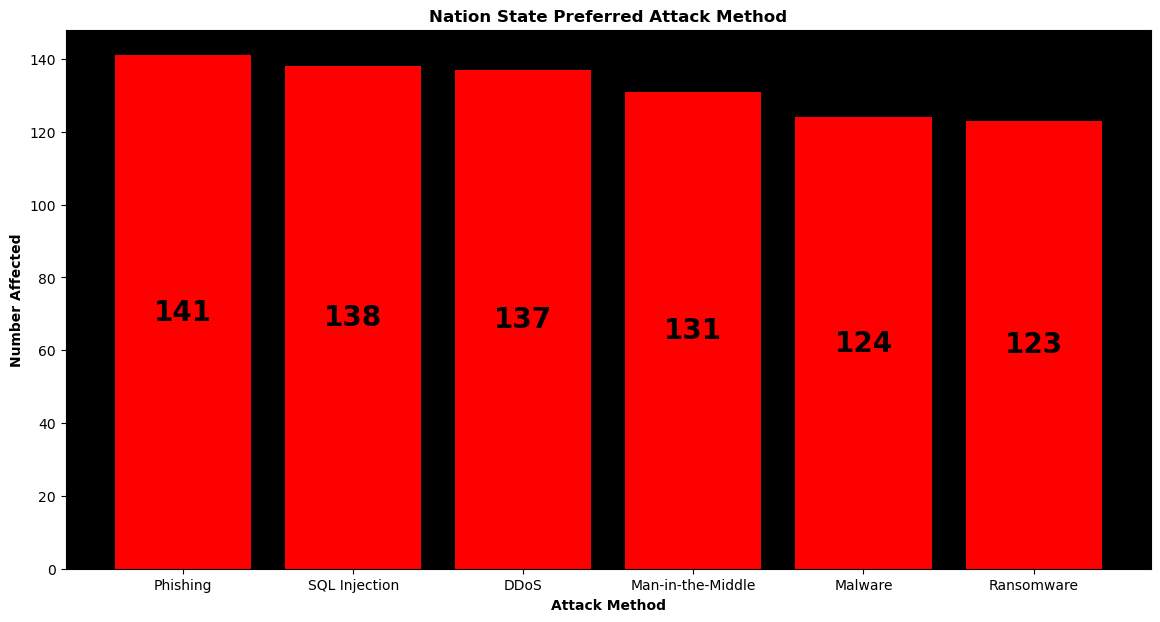

In [32]:
fig, ax = plt.subplots(figsize = (14, 7))

bars = ax.bar(df_nationstates_valuecounts.index, df_nationstates_valuecounts, color='red')
(
ax.set_title('Nation State Preferred Attack Method', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Attack Method', weight = 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

(-1.0999983152018433,
 1.0999999197715162,
 -1.0999994053542408,
 1.0999993900843428)

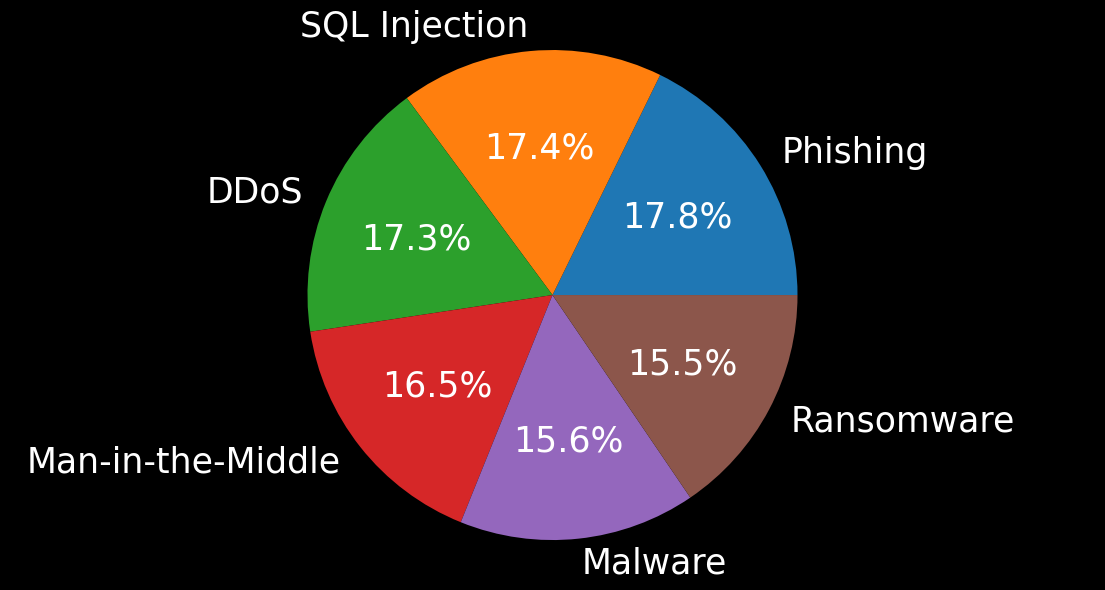

In [33]:
fig, ax = plt.subplots(figsize = (14, 7))
fig.patch.set_facecolor('black')
wedges, texts, autotexts = ax.pie(
    df_nationstates_valuecounts,
    labels = df_nationstates_valuecounts.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 25, 'color': 'white'}
    )
ax.set_facecolor('white')
ax.axis('equal')

Unknown entity preferred attack methods: SQL Injection

In [34]:
df_unknown = df_cyber[df_cyber['Attack Source'] == 'Unknown']
df_unknown

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
5,Germany,2017,Man-in-the-Middle,Retail,98.24,285201,Unknown,Social Engineering,Antivirus,25
7,France,2018,SQL Injection,Government,59.23,909991,Unknown,Social Engineering,Antivirus,66
8,India,2016,Man-in-the-Middle,Banking,16.88,698249,Unknown,Social Engineering,VPN,47
10,China,2019,Phishing,Telecommunications,88.67,493675,Unknown,Zero-day,VPN,29
14,France,2024,DDoS,IT,48.01,922258,Unknown,Social Engineering,Encryption,64
...,...,...,...,...,...,...,...,...,...,...
2970,India,2019,DDoS,Banking,14.98,849664,Unknown,Social Engineering,Antivirus,40
2972,India,2023,Man-in-the-Middle,Retail,12.96,254903,Unknown,Social Engineering,Firewall,4
2990,France,2015,Phishing,Telecommunications,65.16,998011,Unknown,Zero-day,Encryption,14
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52


In [35]:
df_unknown_valuecounts = df_unknown['Attack Type'].value_counts()
df_unknown_valuecounts

Attack Type
SQL Injection        141
Phishing             134
Ransomware           131
DDoS                 125
Malware              123
Man-in-the-Middle    114
Name: count, dtype: int64

[Text(0, 0, '141'),
 Text(0, 0, '134'),
 Text(0, 0, '131'),
 Text(0, 0, '125'),
 Text(0, 0, '123'),
 Text(0, 0, '114')]

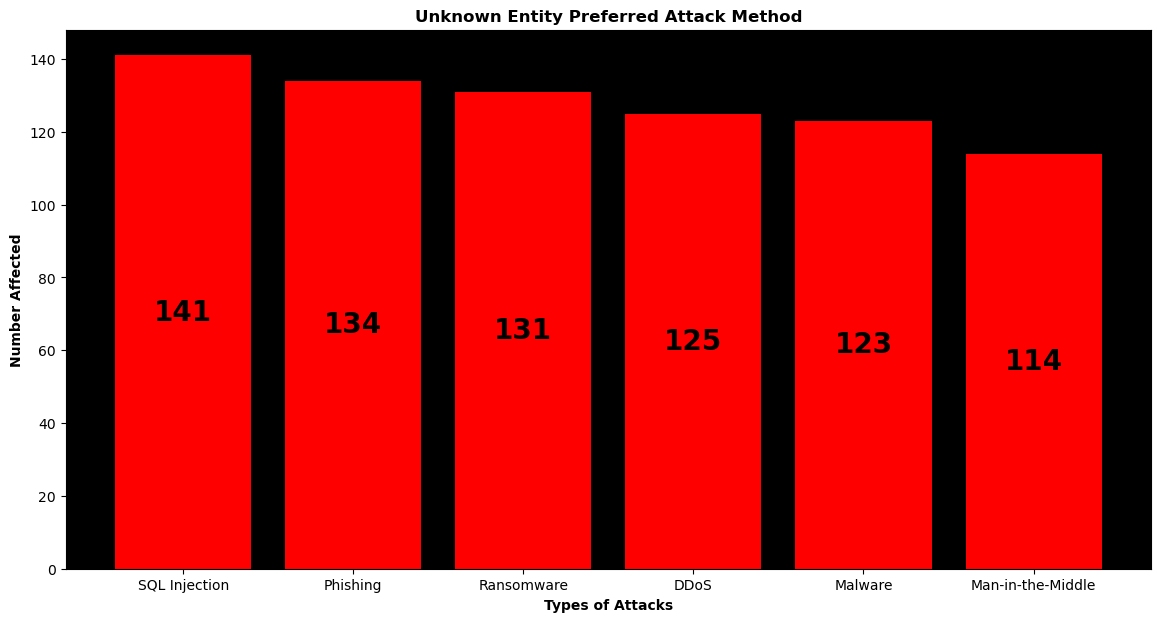

In [36]:
fig, ax = plt.subplots(figsize = (14, 7))

bars = ax.bar(df_unknown_valuecounts.index, df_unknown_valuecounts, color='red')
(
ax.set_title('Unknown Entity Preferred Attack Method', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attacks', weight= 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

Insider threat preferred attack: DDoS

In [37]:
df_insider = df_cyber[df_cyber['Attack Source'] == 'Insider']
df_insider

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
6,Germany,2016,DDoS,Telecommunications,33.26,431262,Insider,Unpatched Software,VPN,34
12,India,2019,Ransomware,Education,30.56,583204,Insider,Zero-day,Firewall,37
17,India,2015,DDoS,IT,93.14,805278,Insider,Social Engineering,Encryption,56
18,UK,2019,Malware,Telecommunications,14.01,578443,Insider,Social Engineering,Firewall,28
...,...,...,...,...,...,...,...,...,...,...
2984,Germany,2021,Malware,Retail,43.99,431678,Insider,Unpatched Software,Encryption,60
2985,Russia,2023,SQL Injection,Telecommunications,79.71,358439,Insider,Unpatched Software,Antivirus,48
2993,Germany,2017,SQL Injection,Education,54.98,786577,Insider,Unpatched Software,Firewall,70
2994,Germany,2019,Ransomware,Government,58.60,76066,Insider,Unpatched Software,AI-based Detection,8


In [38]:
df_insider_valuecounts = df_insider['Attack Type'].value_counts()
df_insider_valuecounts

Attack Type
DDoS                 147
Phishing             129
SQL Injection        127
Ransomware           121
Malware              121
Man-in-the-Middle    107
Name: count, dtype: int64

[Text(0, 0, '147'),
 Text(0, 0, '129'),
 Text(0, 0, '127'),
 Text(0, 0, '121'),
 Text(0, 0, '121'),
 Text(0, 0, '107')]

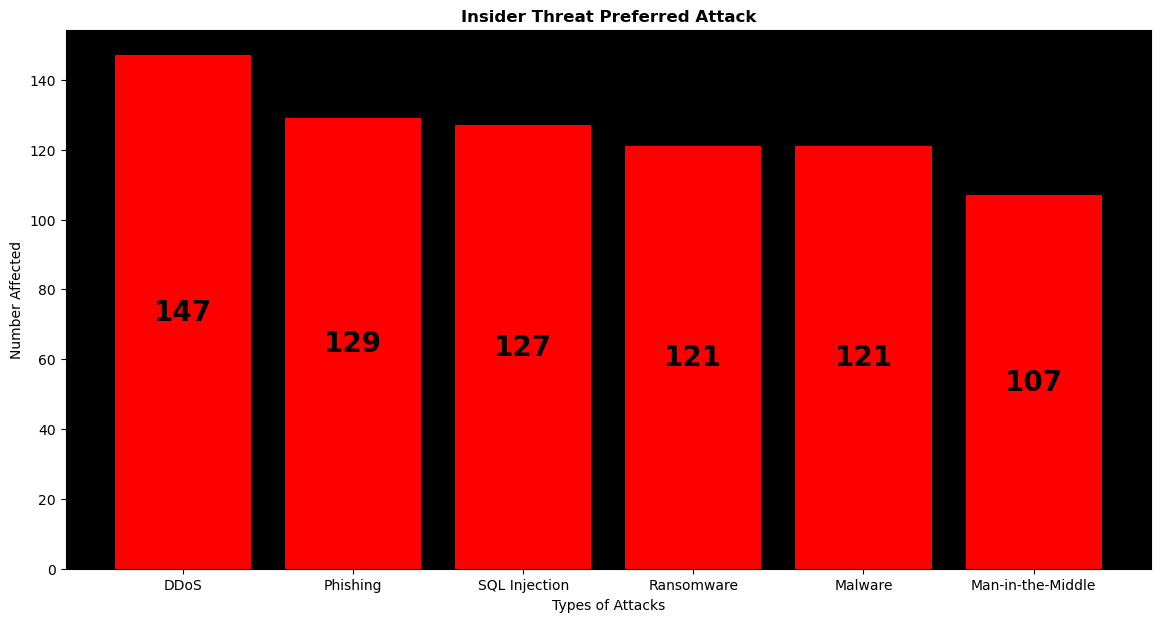

In [39]:
fig, ax = plt.subplots(figsize = (14, 7))

bars = ax.bar(df_insider_valuecounts.index, df_insider_valuecounts, color='red')
(
ax.set_title('Insider Threat Preferred Attack', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attacks'),
ax.set_ylabel('Number Affected')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

Hacker Group Preferred Attack method

In [40]:
df_hacker = df_cyber[df_cyber['Attack Source'] == 'Hacker Group']
df_hacker

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
9,UK,2023,DDoS,Healthcare,69.14,685927,Hacker Group,Unpatched Software,Firewall,58
11,China,2016,SQL Injection,Healthcare,38.81,920768,Hacker Group,Unpatched Software,AI-based Detection,27
...,...,...,...,...,...,...,...,...,...,...
2963,Russia,2015,Ransomware,Retail,46.96,672033,Hacker Group,Social Engineering,Antivirus,2
2966,France,2021,SQL Injection,Banking,78.89,704427,Hacker Group,Zero-day,VPN,30
2983,Australia,2024,DDoS,Telecommunications,36.49,35041,Hacker Group,Social Engineering,Antivirus,14
2988,USA,2022,SQL Injection,IT,37.94,691377,Hacker Group,Social Engineering,Antivirus,44


In [41]:
df_hacker_valuecounts = df_hacker['Attack Type'].value_counts()
df_hacker_valuecounts

Attack Type
Phishing             125
DDoS                 122
Ransomware           118
Malware              117
Man-in-the-Middle    107
SQL Injection         97
Name: count, dtype: int64

[Text(0, 0, '125'),
 Text(0, 0, '122'),
 Text(0, 0, '118'),
 Text(0, 0, '117'),
 Text(0, 0, '107'),
 Text(0, 0, '97')]

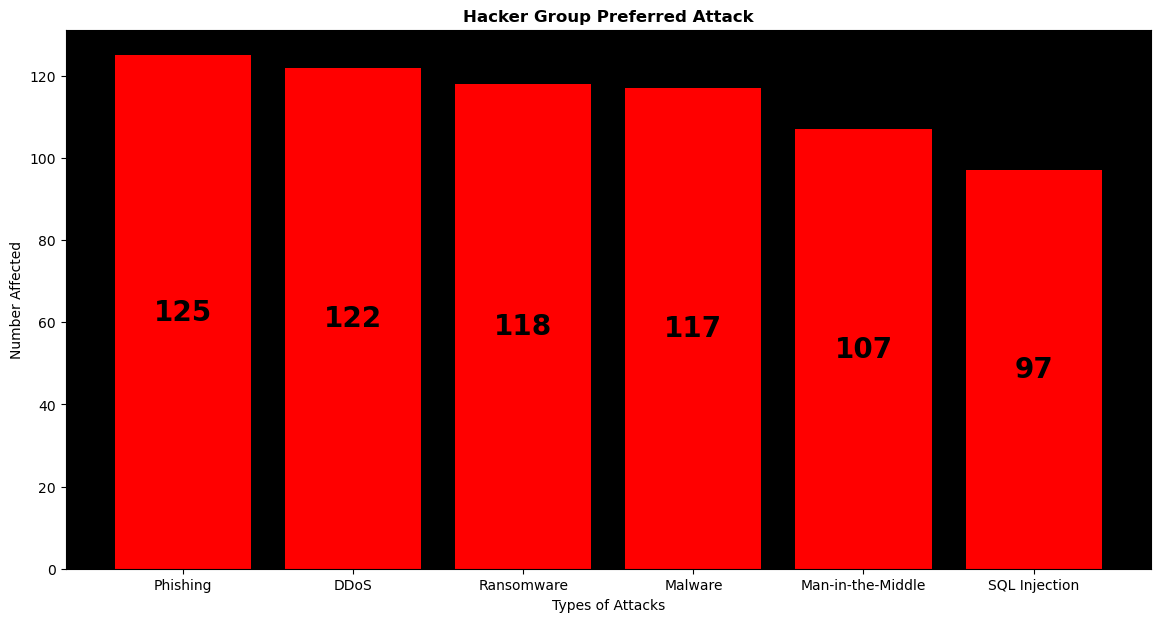

In [42]:
fig, ax = plt.subplots(figsize = (14, 7))

bars = ax.bar(df_hacker_valuecounts.index, df_hacker_valuecounts, color='red')
(
ax.set_title('Hacker Group Preferred Attack', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attacks'),
ax.set_ylabel('Number Affected')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

3. Countries hit the most: UK, Brazil, India, France

In [43]:
countries_hit = df_cyber['Country'].value_counts()
print(countries_hit)

Country
UK           321
Brazil       310
India        308
France       305
Japan        305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64


[Text(0, 0, '321'),
 Text(0, 0, '310'),
 Text(0, 0, '308'),
 Text(0, 0, '305'),
 Text(0, 0, '305'),
 Text(0, 0, '297'),
 Text(0, 0, '295'),
 Text(0, 0, '291'),
 Text(0, 0, '287'),
 Text(0, 0, '281')]

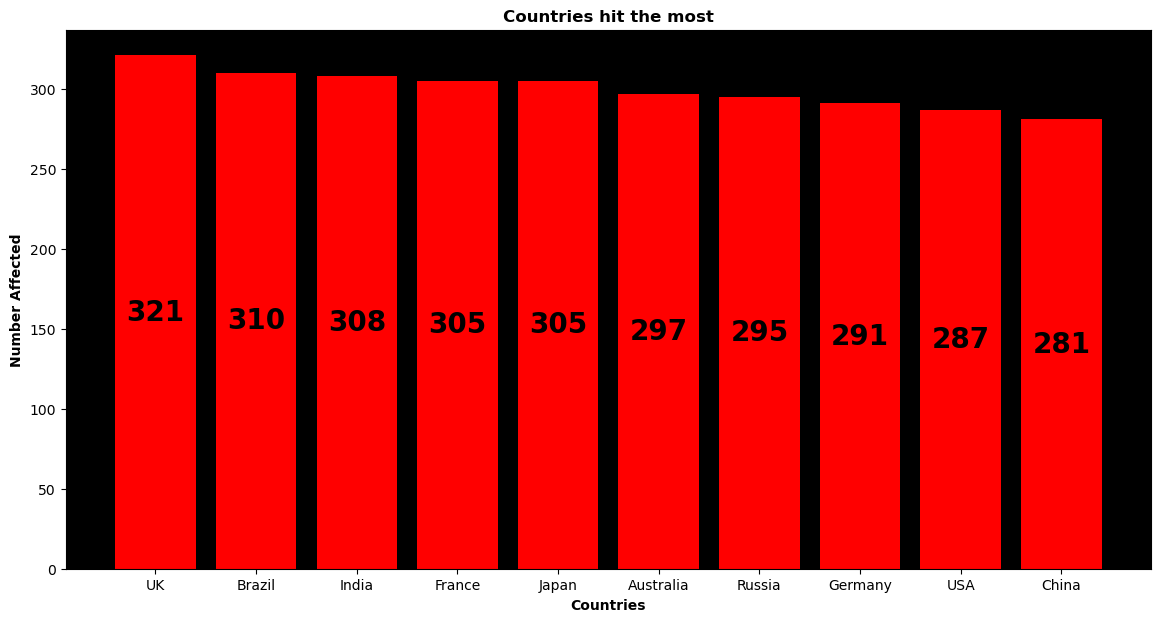

In [44]:
fig,ax = plt.subplots(figsize = (14, 7))
bars = ax.bar(countries_hit.index, countries_hit, color='red')
(
ax.set_title('Countries hit the most', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Countries', weight = 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
)
plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

Industry Hit the most in UK

In [45]:
df_UK_industry = df_cyber[df_cyber['Country'] == 'UK']
df_UK_industry

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
9,UK,2023,DDoS,Healthcare,69.14,685927,Hacker Group,Unpatched Software,Firewall,58
18,UK,2019,Malware,Telecommunications,14.01,578443,Insider,Social Engineering,Firewall,28
30,UK,2022,SQL Injection,Education,66.24,678876,Hacker Group,Social Engineering,AI-based Detection,11
42,UK,2019,Man-in-the-Middle,Retail,39.77,757694,Nation-state,Unpatched Software,Encryption,69
...,...,...,...,...,...,...,...,...,...,...
2933,UK,2016,SQL Injection,Healthcare,63.93,165204,Hacker Group,Social Engineering,Encryption,18
2962,UK,2023,Malware,Retail,28.79,6691,Hacker Group,Zero-day,VPN,57
2992,UK,2021,Malware,Banking,60.14,191427,Nation-state,Zero-day,Encryption,56
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52


In [46]:
df_UK_industry_valuecounts = df_UK_industry['Target Industry'].value_counts()
df_UK_industry_valuecounts

Target Industry
IT                    55
Banking               55
Telecommunications    47
Retail                46
Government            45
Healthcare            37
Education             36
Name: count, dtype: int64

[Text(0, 0, '55'),
 Text(0, 0, '55'),
 Text(0, 0, '47'),
 Text(0, 0, '46'),
 Text(0, 0, '45'),
 Text(0, 0, '37'),
 Text(0, 0, '36')]

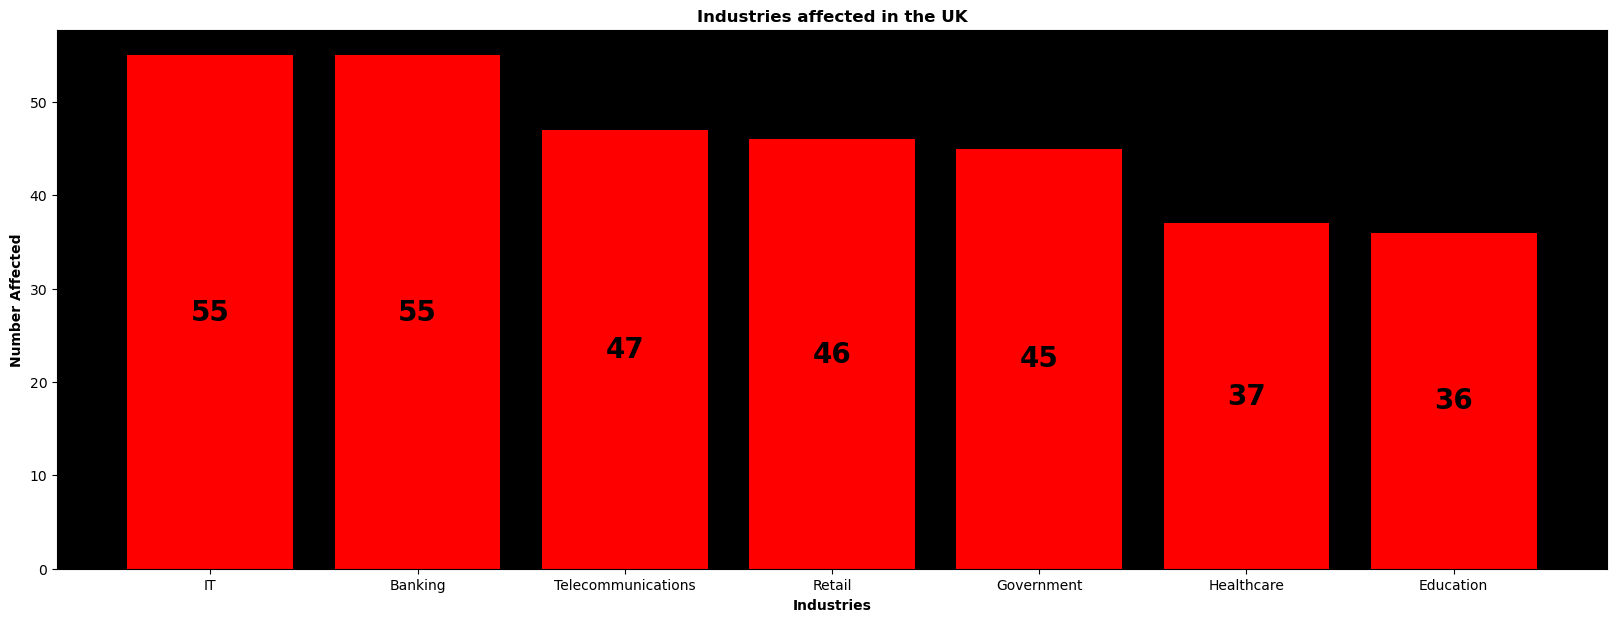

In [47]:
fig, ax = plt.subplots(figsize = (20, 7))

bars = ax.bar(df_UK_industry_valuecounts.index, df_UK_industry_valuecounts, color='red')
(
ax.set_title('Industries affected in the UK', weight ='bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Industries', weight = 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

Industry Hit the most in Brazil

In [48]:
df_BZ_industry = df_cyber[df_cyber['Country'] == 'Brazil']
df_BZ_industry

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
20,Brazil,2015,Ransomware,Retail,49.55,920172,Hacker Group,Weak Passwords,Antivirus,43
24,Brazil,2023,DDoS,Telecommunications,51.84,699007,Hacker Group,Social Engineering,VPN,30
34,Brazil,2023,Phishing,Healthcare,14.51,113777,Nation-state,Weak Passwords,VPN,27
35,Brazil,2020,Phishing,Banking,17.75,739540,Hacker Group,Zero-day,Encryption,31
39,Brazil,2016,DDoS,Education,96.98,140812,Nation-state,Unpatched Software,VPN,71
...,...,...,...,...,...,...,...,...,...,...
2973,Brazil,2016,Man-in-the-Middle,Education,19.59,647998,Insider,Weak Passwords,AI-based Detection,38
2986,Brazil,2015,Malware,Healthcare,88.08,905770,Nation-state,Zero-day,VPN,9
2989,Brazil,2021,Ransomware,Education,18.11,849791,Nation-state,Unpatched Software,VPN,53
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26


In [49]:
df_BZ_industry_valuecounts = df_BZ_industry['Target Industry'].value_counts()
df_BZ_industry_valuecounts

Target Industry
Healthcare            50
IT                    50
Banking               47
Education             47
Retail                44
Telecommunications    36
Government            36
Name: count, dtype: int64

[Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '47'),
 Text(0, 0, '47'),
 Text(0, 0, '44'),
 Text(0, 0, '36'),
 Text(0, 0, '36')]

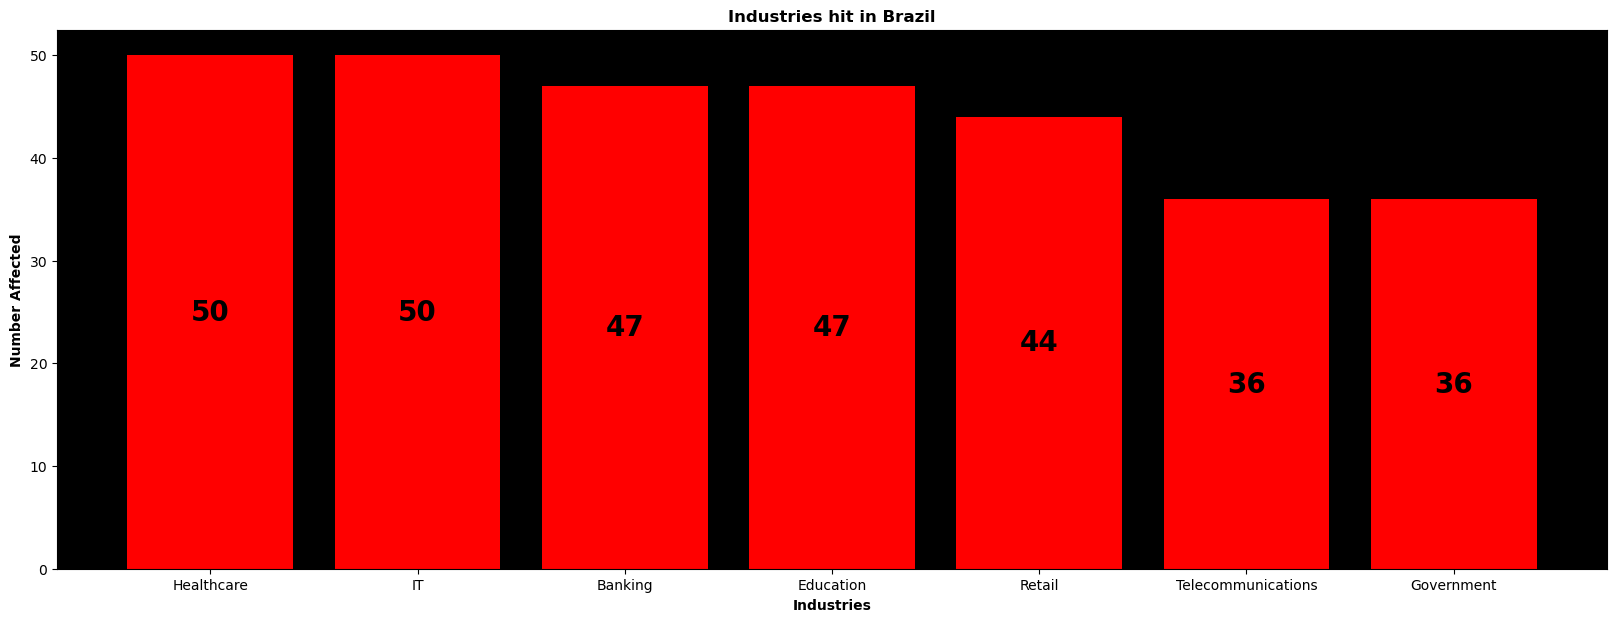

In [50]:
fig, ax = plt.subplots(figsize = (20, 7))

bars = ax.bar(df_BZ_industry_valuecounts.index, df_BZ_industry_valuecounts, color='red')
(
ax.set_title('Industries hit in Brazil', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Industries', weight = 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

Industry Hit the most in India

In [51]:
df_IND_industry = df_cyber[df_cyber['Country'] == 'India']
df_IND_industry

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
8,India,2016,Man-in-the-Middle,Banking,16.88,698249,Unknown,Social Engineering,VPN,47
12,India,2019,Ransomware,Education,30.56,583204,Insider,Zero-day,Firewall,37
17,India,2015,DDoS,IT,93.14,805278,Insider,Social Engineering,Encryption,56
19,India,2016,DDoS,IT,36.45,261808,Nation-state,Social Engineering,AI-based Detection,6
...,...,...,...,...,...,...,...,...,...,...
2967,India,2018,SQL Injection,Government,80.00,147384,Unknown,Zero-day,Firewall,54
2970,India,2019,DDoS,Banking,14.98,849664,Unknown,Social Engineering,Antivirus,40
2972,India,2023,Man-in-the-Middle,Retail,12.96,254903,Unknown,Social Engineering,Firewall,4
2974,India,2022,Phishing,IT,37.76,800909,Nation-state,Zero-day,Antivirus,53


In [52]:
df_IND_industry_valuecounts = df_IND_industry['Target Industry'].value_counts()
df_IND_industry

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
8,India,2016,Man-in-the-Middle,Banking,16.88,698249,Unknown,Social Engineering,VPN,47
12,India,2019,Ransomware,Education,30.56,583204,Insider,Zero-day,Firewall,37
17,India,2015,DDoS,IT,93.14,805278,Insider,Social Engineering,Encryption,56
19,India,2016,DDoS,IT,36.45,261808,Nation-state,Social Engineering,AI-based Detection,6
...,...,...,...,...,...,...,...,...,...,...
2967,India,2018,SQL Injection,Government,80.00,147384,Unknown,Zero-day,Firewall,54
2970,India,2019,DDoS,Banking,14.98,849664,Unknown,Social Engineering,Antivirus,40
2972,India,2023,Man-in-the-Middle,Retail,12.96,254903,Unknown,Social Engineering,Firewall,4
2974,India,2022,Phishing,IT,37.76,800909,Nation-state,Zero-day,Antivirus,53


[Text(0, 0, '53'),
 Text(0, 0, '46'),
 Text(0, 0, '44'),
 Text(0, 0, '44'),
 Text(0, 0, '42'),
 Text(0, 0, '40'),
 Text(0, 0, '39')]

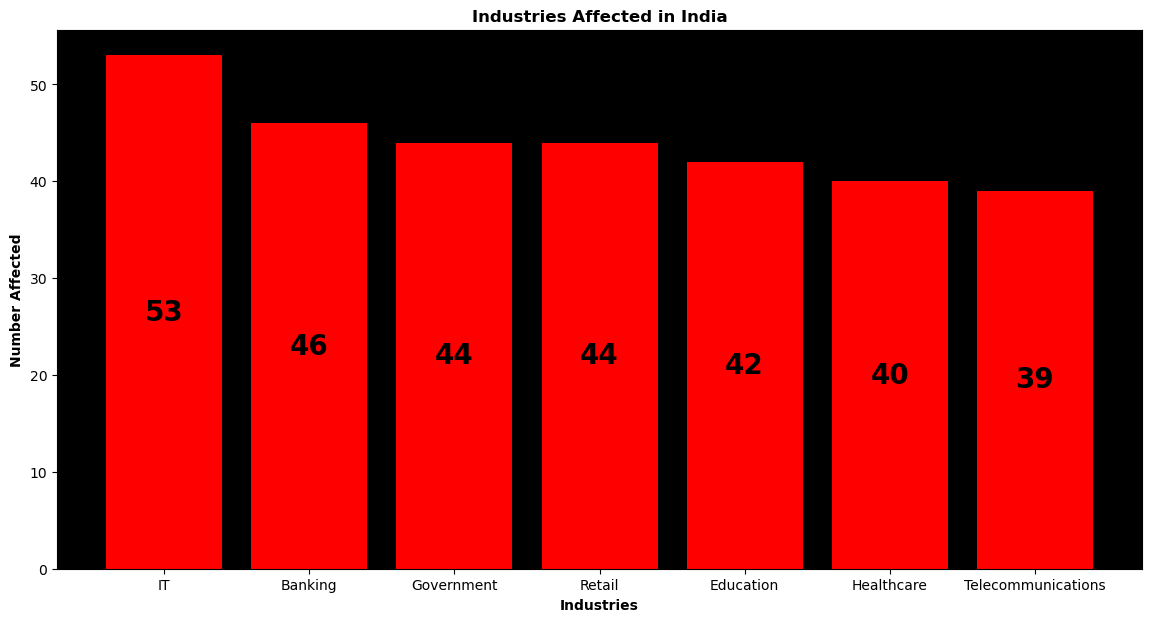

In [53]:
fig, ax = plt.subplots(figsize = (14, 7))

bars = ax.bar(df_IND_industry_valuecounts.index, df_IND_industry_valuecounts, color = 'red')
(
ax.set_title('Industries Affected in India', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Industries', weight = 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

Industry hit the most in France

In [54]:
df_FR_industry = df_cyber[df_cyber['Country'] == 'France']
df_FR_industry

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
7,France,2018,SQL Injection,Government,59.23,909991,Unknown,Social Engineering,Antivirus,66
13,France,2023,DDoS,Healthcare,58.37,599797,Nation-state,Unpatched Software,AI-based Detection,35
14,France,2024,DDoS,IT,48.01,922258,Unknown,Social Engineering,Encryption,64
21,France,2023,Ransomware,Education,17.72,261661,Insider,Social Engineering,VPN,11
28,France,2020,Malware,IT,87.32,599757,Unknown,Social Engineering,Antivirus,9
...,...,...,...,...,...,...,...,...,...,...
2960,France,2019,Malware,Retail,71.84,471898,Hacker Group,Social Engineering,VPN,55
2966,France,2021,SQL Injection,Banking,78.89,704427,Hacker Group,Zero-day,VPN,30
2971,France,2024,SQL Injection,Government,9.91,248359,Nation-state,Weak Passwords,Firewall,58
2976,France,2017,Phishing,Healthcare,4.87,388325,Nation-state,Social Engineering,AI-based Detection,39


In [55]:
df_FR_industry_valuecounts = df_FR_industry['Target Industry'].value_counts()
df_FR_industry_valuecounts

Target Industry
Healthcare            54
IT                    50
Government            46
Retail                46
Education             41
Banking               41
Telecommunications    27
Name: count, dtype: int64

[Text(0, 0, '54'),
 Text(0, 0, '50'),
 Text(0, 0, '46'),
 Text(0, 0, '46'),
 Text(0, 0, '41'),
 Text(0, 0, '41'),
 Text(0, 0, '27')]

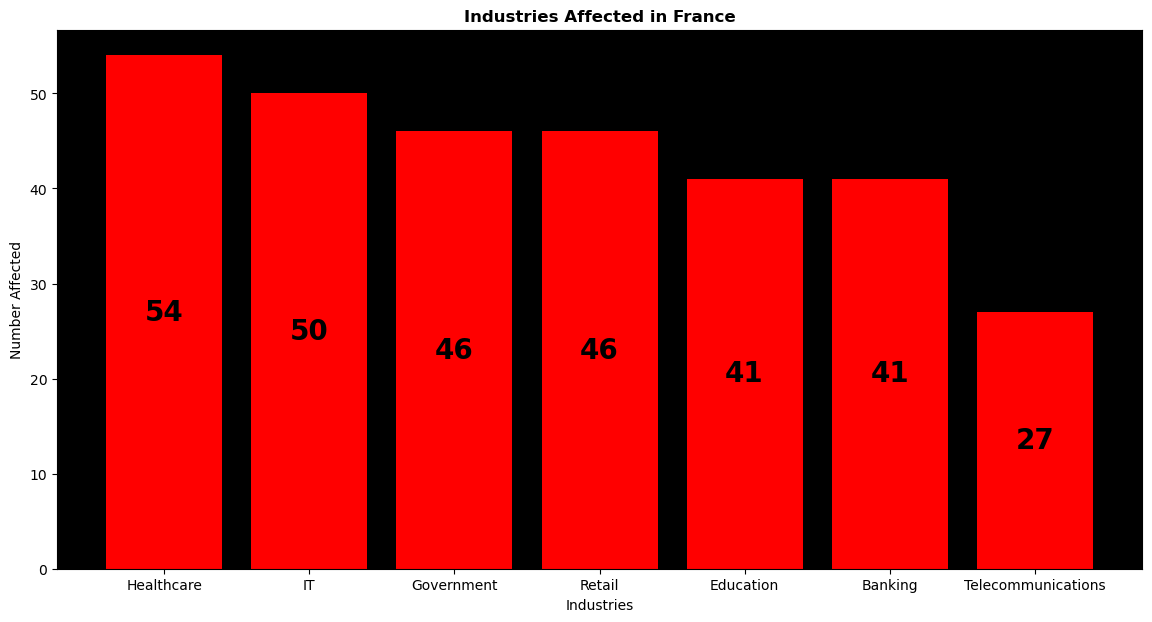

In [56]:
fig, ax = plt.subplots(figsize = (14, 7))

bars = ax.bar(df_FR_industry_valuecounts.index, df_FR_industry_valuecounts, color = 'red')
(
ax.set_title('Industries Affected in France', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Industries'),
ax.set_ylabel('Number Affected')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

4. The Industries that were hit the most financially (Financial Loss (in Million $)): IT, Banking, Healthcare

In [57]:
industry_hit = df_cyber['Target Industry'].value_counts()
print(industry_hit)

Target Industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: count, dtype: int64


[Text(0, 0, '478'),
 Text(0, 0, '445'),
 Text(0, 0, '429'),
 Text(0, 0, '423'),
 Text(0, 0, '419'),
 Text(0, 0, '403'),
 Text(0, 0, '403')]

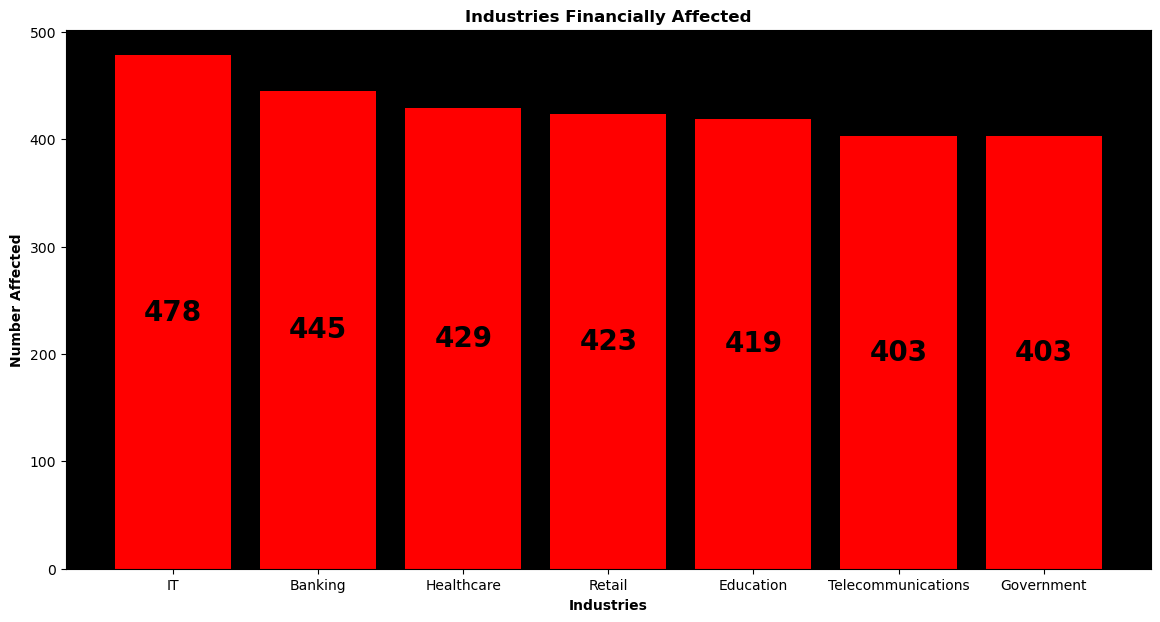

In [58]:
fig,ax = plt.subplots(figsize = (14, 7))
bars = ax.bar(industry_hit.index, industry_hit, color='red')
(
ax.set_title('Industries Financially Affected', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Industries', weight = 'bold'),
ax.set_ylabel('Number Affected', weight = 'bold')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

(-1.0999994229412589,
 1.0999999725210123,
 -1.0999996034736423,
 1.0999995462169305)

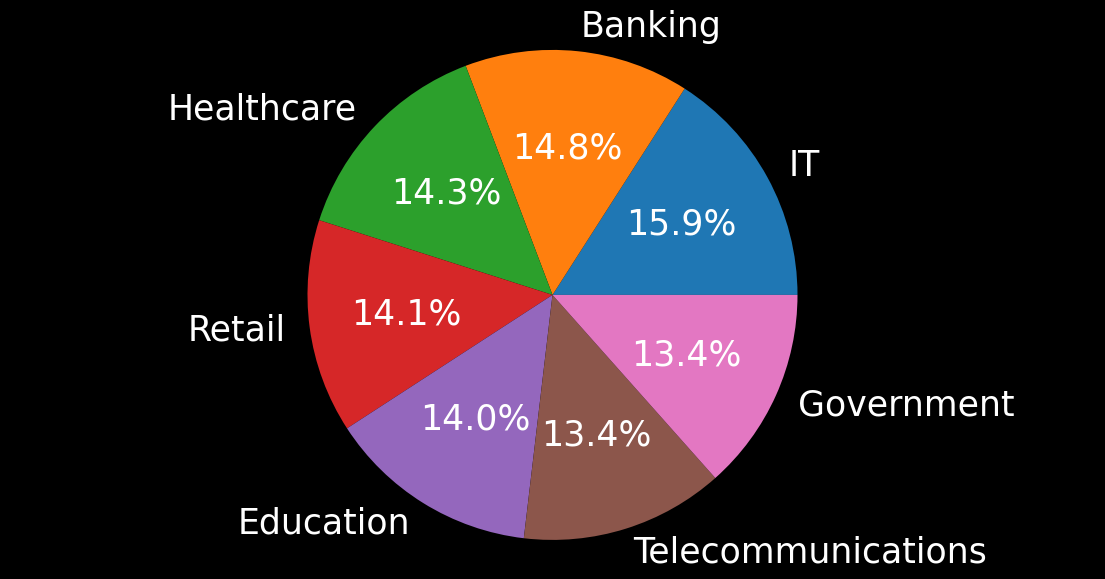

In [59]:
fig, ax = plt.subplots(figsize = (14, 7))
fig.patch.set_facecolor('black')
wedges, texts, autotexts = ax.pie(
    industry_hit,
    labels = industry_hit.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 25, 'color': 'white'}
    )
ax.set_facecolor('white')
ax.axis('equal')

Financial Loss of IT from 2015-2024

In [60]:
IT_loss = df_cyber[df_cyber['Target Industry'] == 'IT']
IT_loss

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
14,France,2024,DDoS,IT,48.01,922258,Unknown,Social Engineering,Encryption,64
17,India,2015,DDoS,IT,93.14,805278,Insider,Social Engineering,Encryption,56
19,India,2016,DDoS,IT,36.45,261808,Nation-state,Social Engineering,AI-based Detection,6
...,...,...,...,...,...,...,...,...,...,...
2969,Russia,2022,SQL Injection,IT,2.10,354694,Insider,Weak Passwords,Encryption,18
2974,India,2022,Phishing,IT,37.76,800909,Nation-state,Zero-day,Antivirus,53
2988,USA,2022,SQL Injection,IT,37.94,691377,Hacker Group,Social Engineering,Antivirus,44
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30


In [61]:
IT_total_loss = sum(IT_loss['Financial Loss (in Million $)'])
IT_total_loss

24809.83

Financial Loss of Banking from 2015-2024

In [62]:
banking_loss = df_cyber[df_cyber['Target Industry'] == 'Banking']
banking_loss

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
8,India,2016,Man-in-the-Middle,Banking,16.88,698249,Unknown,Social Engineering,VPN,47
15,Australia,2022,Phishing,Banking,64.31,120789,Nation-state,Zero-day,Encryption,36
27,Japan,2022,Ransomware,Banking,26.17,937653,Insider,Unpatched Software,Encryption,24
33,Japan,2022,Phishing,Banking,98.47,972469,Nation-state,Zero-day,Antivirus,21
35,Brazil,2020,Phishing,Banking,17.75,739540,Hacker Group,Zero-day,Encryption,31
...,...,...,...,...,...,...,...,...,...,...
2966,France,2021,SQL Injection,Banking,78.89,704427,Hacker Group,Zero-day,VPN,30
2968,Brazil,2015,Ransomware,Banking,63.14,545908,Insider,Social Engineering,AI-based Detection,2
2970,India,2019,DDoS,Banking,14.98,849664,Unknown,Social Engineering,Antivirus,40
2991,Russia,2019,Ransomware,Banking,28.14,594170,Nation-state,Social Engineering,AI-based Detection,53


In [63]:
banking_total_loss = sum(banking_loss['Financial Loss (in Million $)'])
banking_total_loss

22772.39

Financial loss from Gov 2015-2024

In [64]:
gov_loss = df_cyber[df_cyber['Target Industry'] == 'Government']
gov_loss

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
7,France,2018,SQL Injection,Government,59.23,909991,Unknown,Social Engineering,Antivirus,66
22,India,2017,DDoS,Government,76.71,246205,Nation-state,Unpatched Software,Firewall,30
29,Australia,2015,DDoS,Government,82.70,904805,Hacker Group,Zero-day,Encryption,61
46,Australia,2016,SQL Injection,Government,27.33,481293,Hacker Group,Unpatched Software,Antivirus,65
51,Australia,2019,Malware,Government,21.72,984411,Insider,Unpatched Software,Antivirus,1
...,...,...,...,...,...,...,...,...,...,...
2959,Russia,2015,Malware,Government,54.59,728308,Unknown,Zero-day,Firewall,10
2967,India,2018,SQL Injection,Government,80.00,147384,Unknown,Zero-day,Firewall,54
2971,France,2024,SQL Injection,Government,9.91,248359,Nation-state,Weak Passwords,Firewall,58
2994,Germany,2019,Ransomware,Government,58.60,76066,Insider,Unpatched Software,AI-based Detection,8


In [65]:
gov_total_loss = sum(gov_loss['Financial Loss (in Million $)'])
gov_total_loss

21205.33

Bar Graph of Total Financial Losses of Gov, Banking and IT from 2015-2024

In [66]:
total_financial_loss = gov_total_loss + banking_total_loss + IT_total_loss
total_financial_loss

68787.55

[Text(0, 0, '21205.3'), Text(0, 0, '22772.4'), Text(0, 0, '24809.8')]

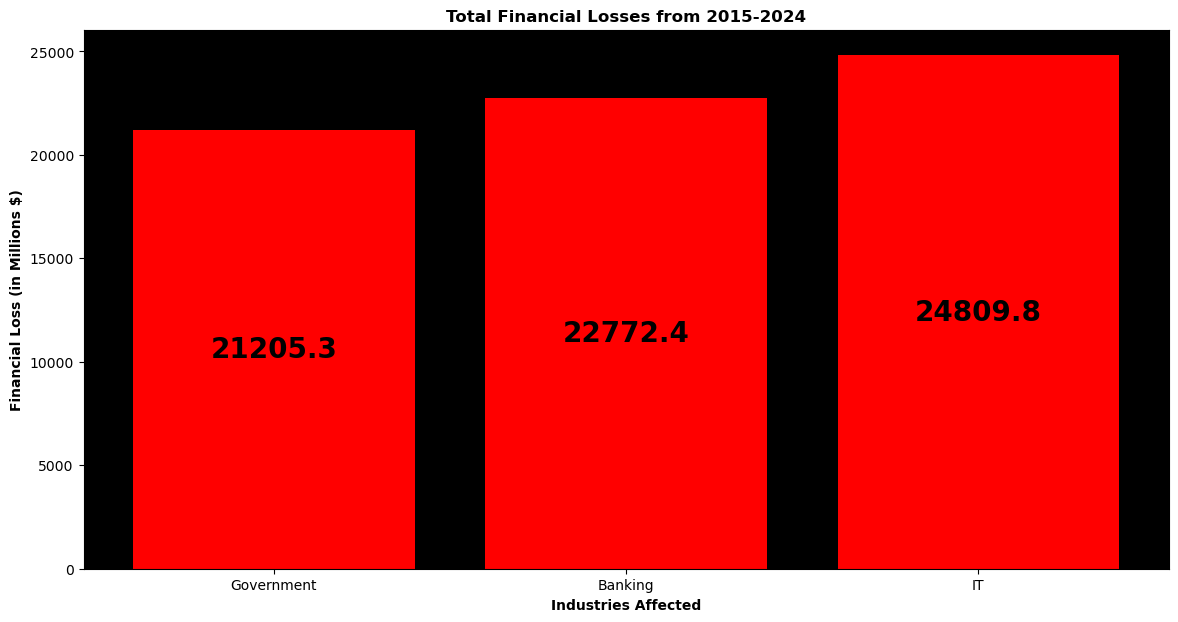

In [67]:
fig,ax = plt.subplots(figsize = (14, 7))
bars = ax.bar(['Government', 'Banking', 'IT'], [gov_total_loss, banking_total_loss, IT_total_loss], color='red')
(
ax.set_title('Total Financial Losses from 2015-2024', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Industries Affected', weight = 'bold'),
ax.set_ylabel('Financial Loss (in Millions $)', weight = 'bold')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

(-1.0999983472668151,
 1.0999999212984197,
 -1.0999984915039187,
 1.0999992642850722)

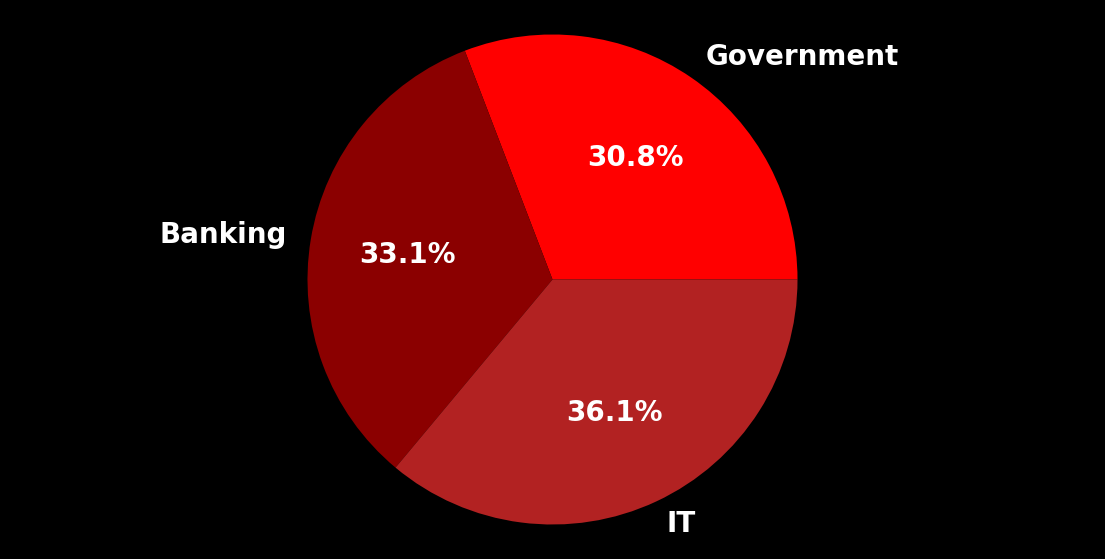

In [68]:
labels = ['Government', 'Banking', 'IT']
sizes = [gov_total_loss, banking_total_loss, IT_total_loss]
colors = ['red', 'darkred', 'firebrick'] 

fig, ax = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor('black')
ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',        
    #startangle=90,            
    textprops={'color': 'white', 'weight': 'bold', 'fontsize': 20}
)
#ax.set_title('Total Financial Losses from 2015-2024', weight='bold', color = 'white')
ax.set_facecolor('#000000')
ax.axis('equal')

5. Most common Defense Mechanism Used (Defense Mechanism Used): Antivirus, VPN, Encryption

In [69]:
Defense_used = df_cyber['Defense Mechanism Used'].value_counts()
print(Defense_used)

Defense Mechanism Used
Antivirus             628
VPN                   612
Encryption            592
Firewall              585
AI-based Detection    583
Name: count, dtype: int64


[Text(0, 0, '628'),
 Text(0, 0, '612'),
 Text(0, 0, '592'),
 Text(0, 0, '585'),
 Text(0, 0, '583')]

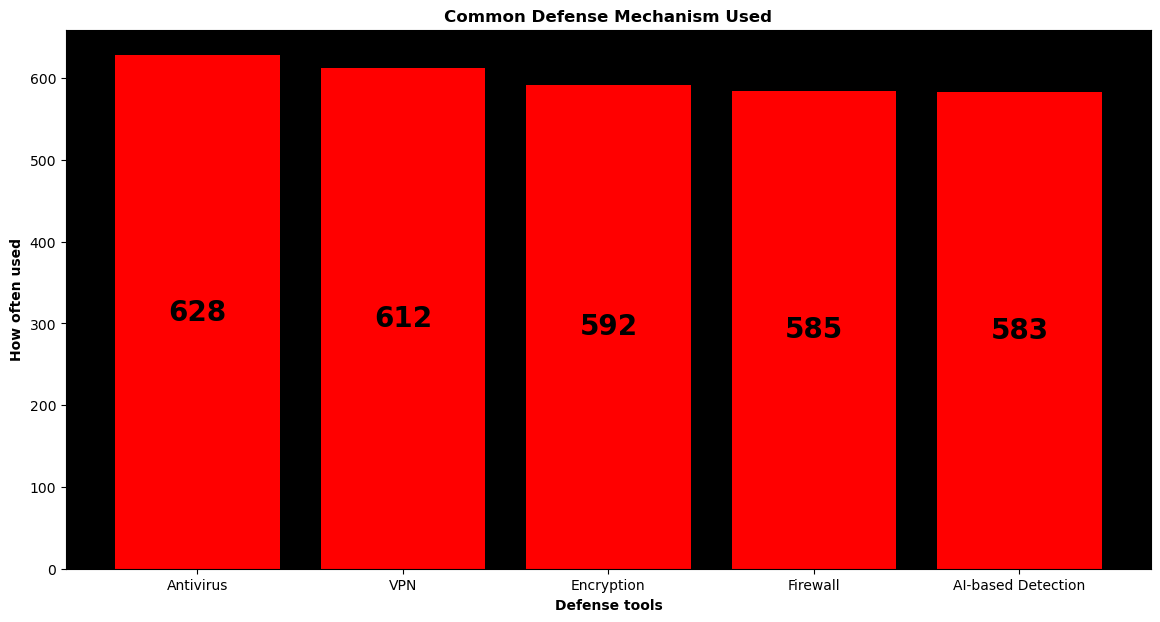

In [70]:
fig,ax = plt.subplots(figsize = (14, 7))
bars = ax.bar(Defense_used.index, Defense_used, color = 'red')
(
ax.set_title('Common Defense Mechanism Used', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Defense tools', weight = 'bold'),
ax.set_ylabel('How often used', weight = 'bold')
)
plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

What are Antivirus mostly defending against?

In [71]:
df_antivirus_used = df_cyber[df_cyber['Defense Mechanism Used'] == 'Antivirus']
df_antivirus_used

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
5,Germany,2017,Man-in-the-Middle,Retail,98.24,285201,Unknown,Social Engineering,Antivirus,25
7,France,2018,SQL Injection,Government,59.23,909991,Unknown,Social Engineering,Antivirus,66
20,Brazil,2015,Ransomware,Retail,49.55,920172,Hacker Group,Weak Passwords,Antivirus,43
23,Japan,2022,Phishing,Telecommunications,20.42,186148,Nation-state,Weak Passwords,Antivirus,32
28,France,2020,Malware,IT,87.32,599757,Unknown,Social Engineering,Antivirus,9
...,...,...,...,...,...,...,...,...,...,...
2974,India,2022,Phishing,IT,37.76,800909,Nation-state,Zero-day,Antivirus,53
2983,Australia,2024,DDoS,Telecommunications,36.49,35041,Hacker Group,Social Engineering,Antivirus,14
2985,Russia,2023,SQL Injection,Telecommunications,79.71,358439,Insider,Unpatched Software,Antivirus,48
2987,Australia,2021,Ransomware,Healthcare,37.89,843256,Nation-state,Unpatched Software,Antivirus,43


In [72]:
df_antivirus_used_valuecounts = df_antivirus_used['Attack Type'].value_counts()
df_antivirus_used_valuecounts

Attack Type
SQL Injection        113
Phishing             111
Malware              111
Ransomware           103
DDoS                 103
Man-in-the-Middle     87
Name: count, dtype: int64

[Text(0, 0, '113'),
 Text(0, 0, '111'),
 Text(0, 0, '111'),
 Text(0, 0, '103'),
 Text(0, 0, '103'),
 Text(0, 0, '87')]

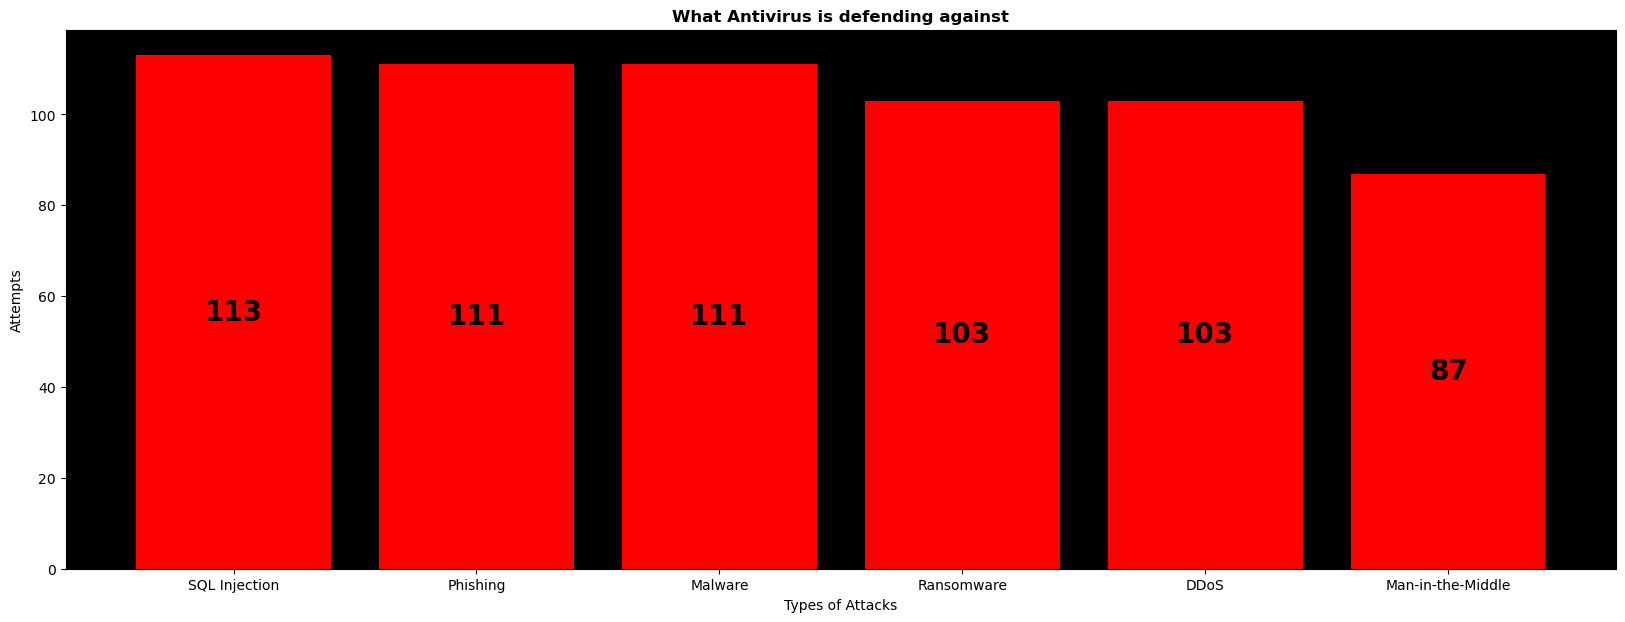

In [73]:
fig, ax = plt.subplots(figsize = (20, 7))
bars = ax.bar(df_antivirus_used_valuecounts.index, df_antivirus_used_valuecounts, color='red')
(
ax.set_title('What Antivirus is defending against', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attacks'),
ax.set_ylabel('Attempts')
)
plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

What are VPNs mostly defending against?

In [74]:
df_VPN_used = df_cyber[df_cyber['Defense Mechanism Used'] == 'VPN']
df_VPN_used

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
6,Germany,2016,DDoS,Telecommunications,33.26,431262,Insider,Unpatched Software,VPN,34
8,India,2016,Man-in-the-Middle,Banking,16.88,698249,Unknown,Social Engineering,VPN,47
...,...,...,...,...,...,...,...,...,...,...
2980,Germany,2015,Ransomware,Healthcare,58.91,801948,Insider,Zero-day,VPN,55
2986,Brazil,2015,Malware,Healthcare,88.08,905770,Nation-state,Zero-day,VPN,9
2989,Brazil,2021,Ransomware,Education,18.11,849791,Nation-state,Unpatched Software,VPN,53
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26


In [75]:
df_VPN_used_valuecounts = df_VPN_used['Attack Type'].value_counts()
df_VPN_used_valuecounts

Attack Type
DDoS                 120
Phishing             112
Ransomware           104
SQL Injection        103
Malware               87
Man-in-the-Middle     86
Name: count, dtype: int64

[Text(0, 0, '120'),
 Text(0, 0, '112'),
 Text(0, 0, '104'),
 Text(0, 0, '103'),
 Text(0, 0, '87'),
 Text(0, 0, '86')]

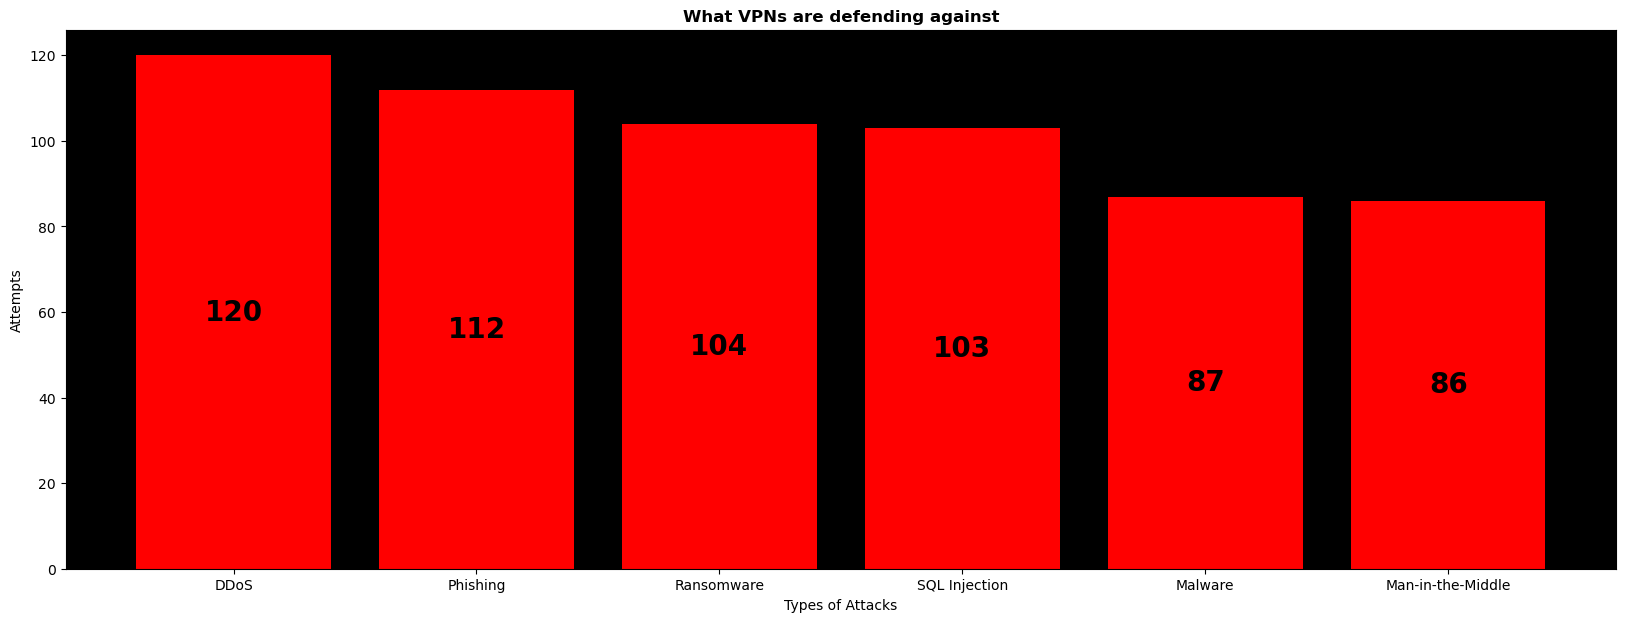

In [76]:
fig, ax = plt.subplots(figsize = (20, 7))
bars = ax.bar(df_VPN_used_valuecounts.index, df_VPN_used_valuecounts, color='red')
(
ax.set_title('What VPNs are defending against', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attacks'),
ax.set_ylabel('Attempts')
)
plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

What are Encryptions mostly defending against?

In [77]:
df_Encryptions_used = df_cyber[df_cyber['Defense Mechanism Used'] == 'Encryption']
df_Encryptions_used

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
14,France,2024,DDoS,IT,48.01,922258,Unknown,Social Engineering,Encryption,64
15,Australia,2022,Phishing,Banking,64.31,120789,Nation-state,Zero-day,Encryption,36
17,India,2015,DDoS,IT,93.14,805278,Insider,Social Engineering,Encryption,56
27,Japan,2022,Ransomware,Banking,26.17,937653,Insider,Unpatched Software,Encryption,24
29,Australia,2015,DDoS,Government,82.70,904805,Hacker Group,Zero-day,Encryption,61
...,...,...,...,...,...,...,...,...,...,...
2978,India,2023,Malware,Healthcare,70.36,992014,Insider,Social Engineering,Encryption,62
2981,China,2015,SQL Injection,Healthcare,24.07,950991,Nation-state,Social Engineering,Encryption,49
2984,Germany,2021,Malware,Retail,43.99,431678,Insider,Unpatched Software,Encryption,60
2990,France,2015,Phishing,Telecommunications,65.16,998011,Unknown,Zero-day,Encryption,14


In [78]:
df_Encryptions_used_valuecounts = df_Encryptions_used['Attack Type'].value_counts()
df_Encryptions_used_valuecounts

Attack Type
Phishing             121
SQL Injection        107
Man-in-the-Middle     95
DDoS                  92
Ransomware            91
Malware               86
Name: count, dtype: int64

[Text(0, 0, '121'),
 Text(0, 0, '107'),
 Text(0, 0, '95'),
 Text(0, 0, '92'),
 Text(0, 0, '91'),
 Text(0, 0, '86')]

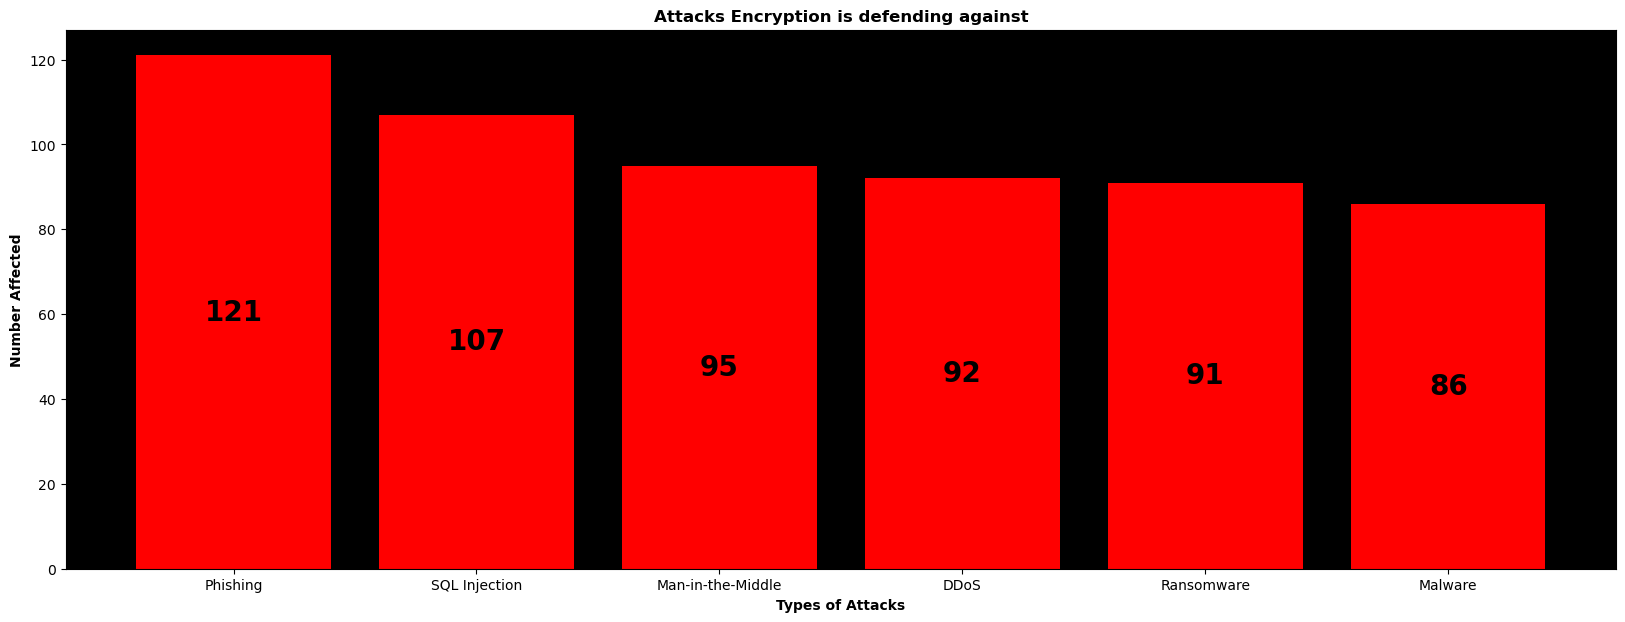

In [79]:
fig, ax = plt.subplots(figsize = (20, 7))
bars = ax.bar(df_Encryptions_used_valuecounts.index, df_Encryptions_used_valuecounts, color='red')
(
ax.set_title('Attacks Encryption is defending against', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attacks', weight='bold'),
ax.set_ylabel('Number Affected', weight='bold')
)
plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

What are Firewalls mostly defending against?

In [80]:
df_Firewalls_used = df_cyber[df_cyber['Defense Mechanism Used'] == 'Firewall']
df_Firewalls_used

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
9,UK,2023,DDoS,Healthcare,69.14,685927,Hacker Group,Unpatched Software,Firewall,58
12,India,2019,Ransomware,Education,30.56,583204,Insider,Zero-day,Firewall,37
18,UK,2019,Malware,Telecommunications,14.01,578443,Insider,Social Engineering,Firewall,28
22,India,2017,DDoS,Government,76.71,246205,Nation-state,Unpatched Software,Firewall,30
...,...,...,...,...,...,...,...,...,...,...
2975,Japan,2015,Man-in-the-Middle,Telecommunications,95.80,23469,Insider,Zero-day,Firewall,64
2982,Germany,2017,Man-in-the-Middle,Healthcare,97.14,875912,Insider,Unpatched Software,Firewall,33
2993,Germany,2017,SQL Injection,Education,54.98,786577,Insider,Unpatched Software,Firewall,70
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52


In [81]:
df_Firewalls_used_valuecounts = df_Firewalls_used['Attack Type'].value_counts()
df_Firewalls_used_valuecounts

Attack Type
Man-in-the-Middle    106
DDoS                 103
Malware               99
Ransomware            98
Phishing              93
SQL Injection         86
Name: count, dtype: int64

[Text(0, 0, '106'),
 Text(0, 0, '103'),
 Text(0, 0, '99'),
 Text(0, 0, '98'),
 Text(0, 0, '93'),
 Text(0, 0, '86')]

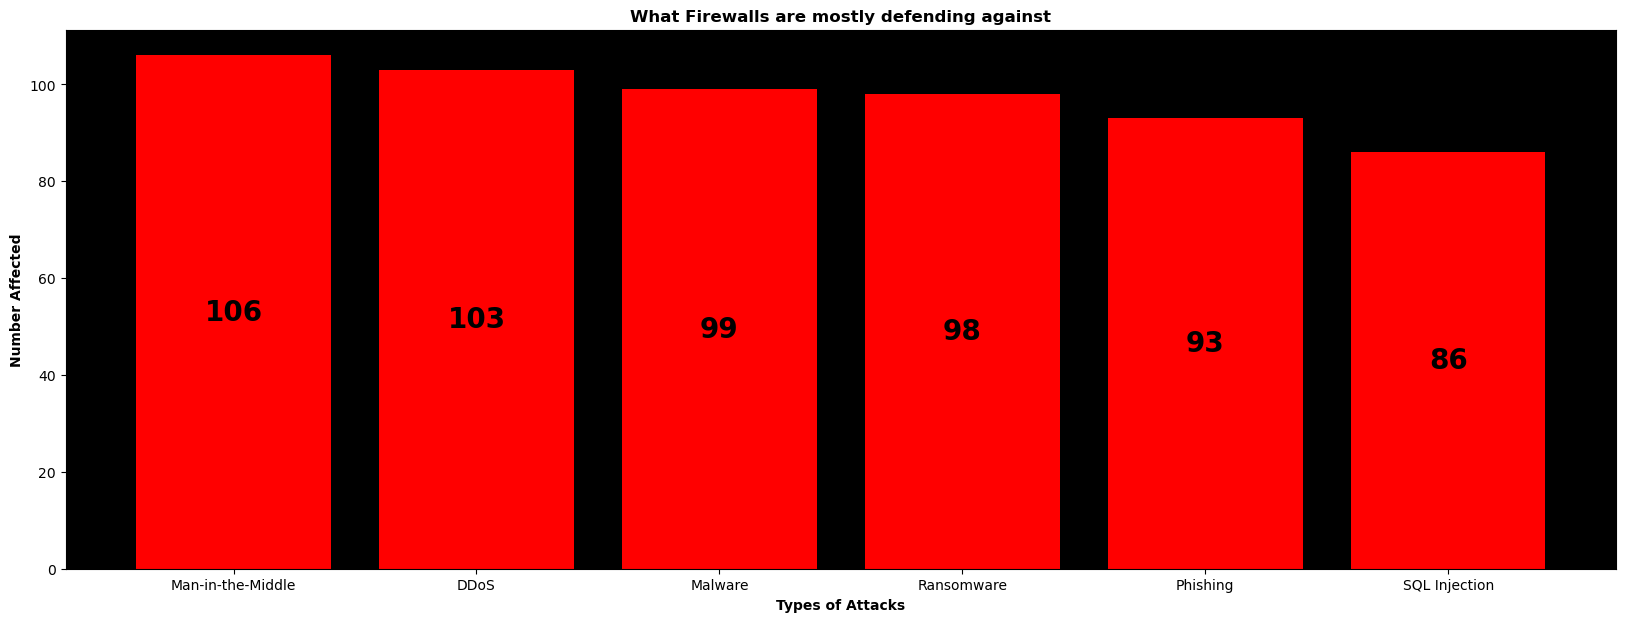

In [82]:
fig, ax = plt.subplots(figsize = (20, 7))
bars = ax.bar(df_Firewalls_used_valuecounts.index, df_Firewalls_used_valuecounts, color='red')
(
ax.set_title('What Firewalls are mostly defending against', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attacks', weight='bold'),
ax.set_ylabel('Number Affected', weight='bold')
)
plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

What is AI based Detection Mostly defending against?

In [83]:
df_AI_used = df_cyber[df_cyber['Defense Mechanism Used'] == 'AI-based Detection']
df_AI_used

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
11,China,2016,SQL Injection,Healthcare,38.81,920768,Hacker Group,Unpatched Software,AI-based Detection,27
13,France,2023,DDoS,Healthcare,58.37,599797,Nation-state,Unpatched Software,AI-based Detection,35
16,Russia,2017,Man-in-the-Middle,Healthcare,13.04,850158,Hacker Group,Unpatched Software,AI-based Detection,67
19,India,2016,DDoS,IT,36.45,261808,Nation-state,Social Engineering,AI-based Detection,6
...,...,...,...,...,...,...,...,...,...,...
2976,France,2017,Phishing,Healthcare,4.87,388325,Nation-state,Social Engineering,AI-based Detection,39
2977,Russia,2018,DDoS,Retail,64.39,359124,Insider,Unpatched Software,AI-based Detection,13
2991,Russia,2019,Ransomware,Banking,28.14,594170,Nation-state,Social Engineering,AI-based Detection,53
2994,Germany,2019,Ransomware,Government,58.60,76066,Insider,Unpatched Software,AI-based Detection,8


In [84]:
df_AI_used_valuecounts = df_AI_used['Attack Type'].value_counts()
df_AI_used_valuecounts

Attack Type
DDoS                 113
Malware              102
Ransomware            97
SQL Injection         94
Phishing              92
Man-in-the-Middle     85
Name: count, dtype: int64

[Text(0, 0, '113'),
 Text(0, 0, '102'),
 Text(0, 0, '97'),
 Text(0, 0, '94'),
 Text(0, 0, '92'),
 Text(0, 0, '85')]

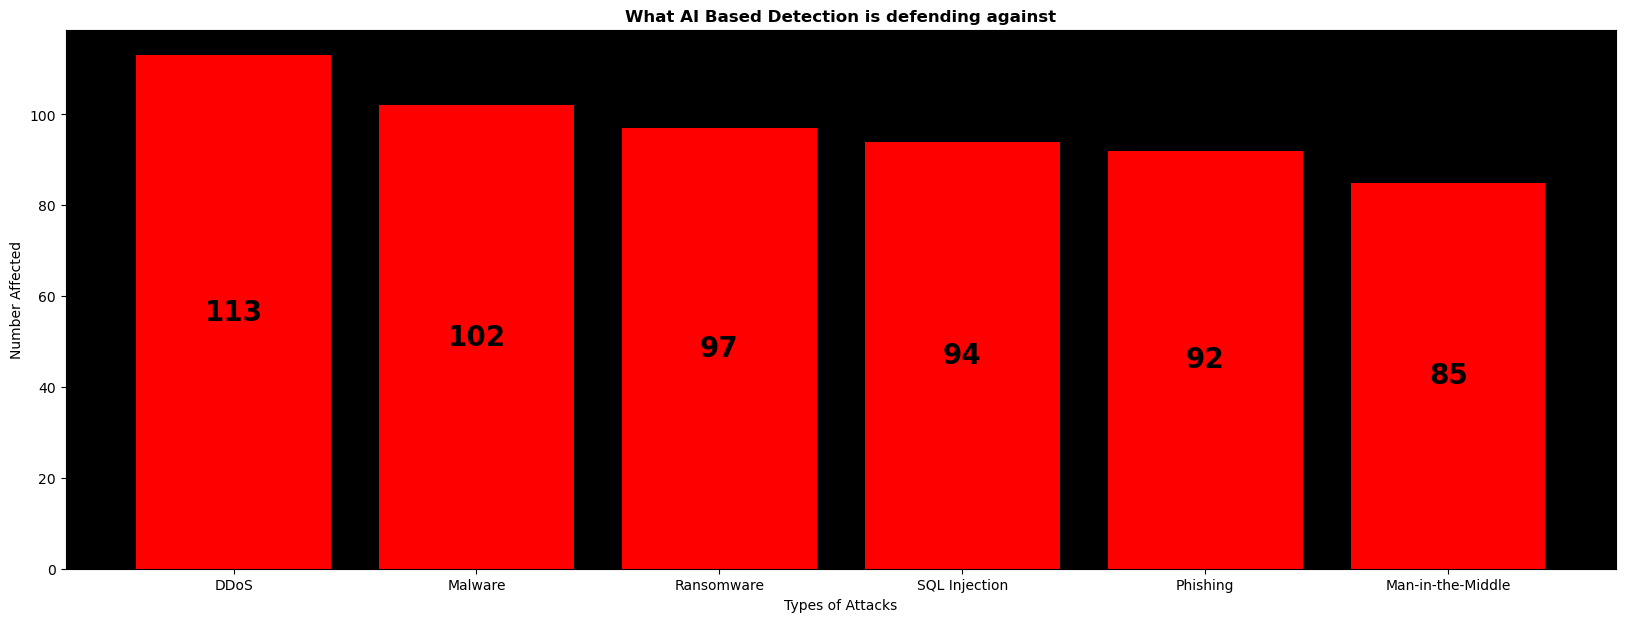

In [85]:
fig, ax = plt.subplots(figsize = (20, 7))
bars = ax.bar(df_AI_used_valuecounts.index, df_AI_used_valuecounts, color='red')
(
ax.set_title('What AI Based Detection is defending against', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Types of Attacks'),
ax.set_ylabel('Number Affected')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')

6. Average time for incident resolution (Incident Resolution Time (In Hours)): Average = 36.476 ; Max = 72 ; Min = 1

In [86]:
avg_resolution = df_cyber['Incident Resolution Time (in Hours)'].mean()
print(avg_resolution)

36.470666666666666


In [87]:
max_resolution = df_cyber['Incident Resolution Time (in Hours)'].max()
print(max_resolution)

72


In [88]:
min_resolution = df_cyber['Incident Resolution Time (in Hours)'].min()
print(min_resolution)

1


Which industry took the longest after an incident to resolve?

In [89]:
df_incident_resolution = df_cyber.groupby('Target Industry').mean(numeric_only=True)
df_incident_resolution

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
Target Industry,,,,
Banking,2019.496629,51.173910,505839.114607,35.737079
Education,2019.556086,47.903174,513137.785203,35.906921
Government,2019.543424,52.618685,499352.431762,37.553350
Healthcare,2019.484848,49.047296,504130.340326,35.806527
IT,2019.504184,51.903410,523210.939331,36.169456
Retail,2019.683215,49.928014,488833.063830,37.219858
Telecommunications,2019.744417,50.766973,495203.746898,37.062035


[Text(0, 0, '35.7371'),
 Text(0, 0, '35.9069'),
 Text(0, 0, '37.5533'),
 Text(0, 0, '35.8065'),
 Text(0, 0, '36.1695'),
 Text(0, 0, '37.2199'),
 Text(0, 0, '37.062')]

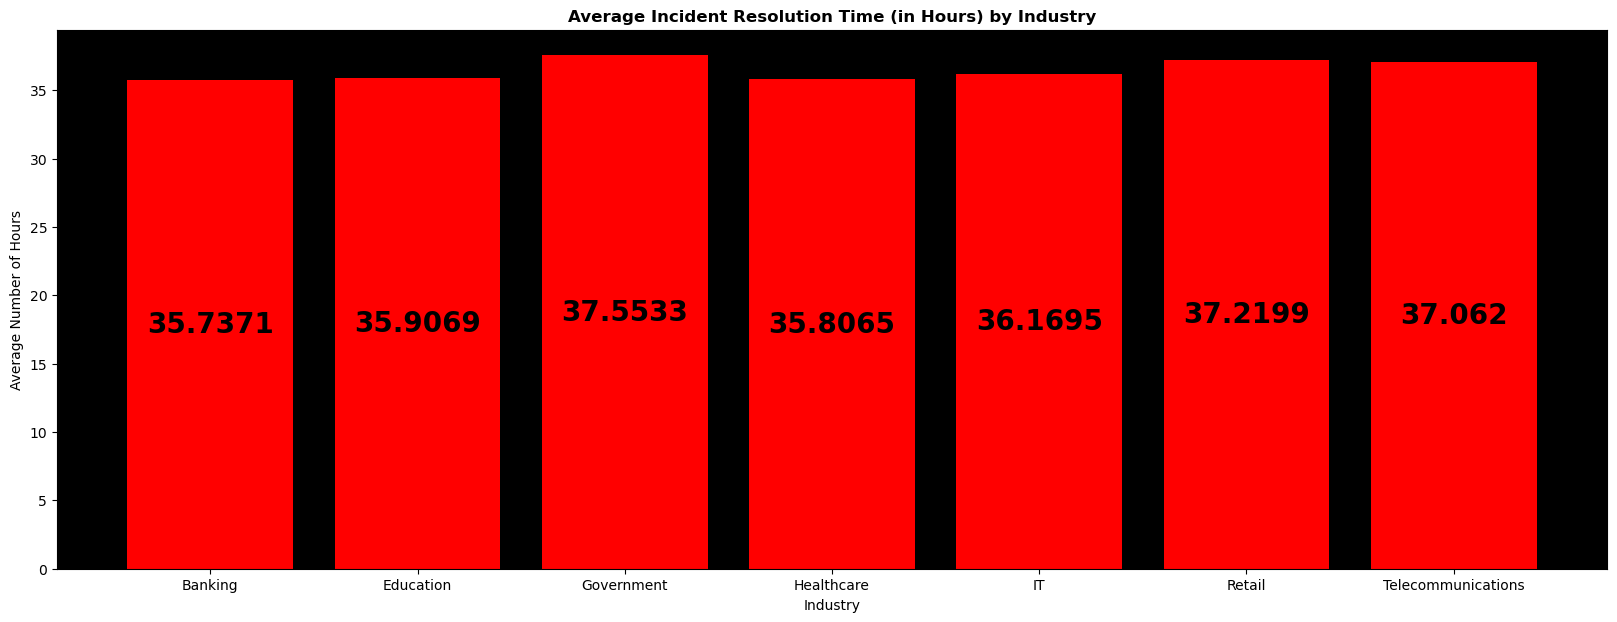

In [90]:
fig, ax = plt.subplots(figsize = (20, 7))
bars = ax.bar(df_incident_resolution.index, df_incident_resolution['Incident Resolution Time (in Hours)'], color='red')
(
ax.set_title('Average Incident Resolution Time (in Hours) by Industry', weight = 'bold'),
ax.set_facecolor('#000000'),
ax.set_xlabel('Industry'),
ax.set_ylabel('Average Number of Hours')
)

plt.bar_label(bars, label_type = 'center', color = 'black', weight = 'bold', fontsize = '20')